In [1]:
library(data.table)
library(caret)
library(Hmisc) # for describe function

Warning message:
"package 'data.table' was built under R version 3.6.2"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"
Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: Formula
Warning message:
"package 'Formula' was built under R version 3.6.3"
Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units



In [2]:
train = fread("train.csv")

## Exploration

In [3]:
head(train)

loan_application_id,loan_amount,default,customer_age,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,...,Var_50,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59
1,2855.0,0,25,3,1,1,37,41,5,...,0,0,0,N,0.0,0,0,1,1,0
2,1577.0,0,53,0,0,0,0,26,2,...,0,0,0,N,0.0,0,0,0,1,0
3,6858.0,0,39,4,2,3,55,58,10,...,700,0,700,N,700.0,0,0,4,6,0
4,2434.5,0,49,3,1,3,98,98,11,...,16350,127,16935,N,8467.5,0,0,0,5,0
5,4964.0,0,47,2,1,1,110,124,15,...,3000,142,3400,N,1700.0,0,0,2,10,0
7,6899.0,0,44,1,0,1,37,37,5,...,150,0,150,N,150.0,0,0,0,3,0


In [4]:
str(train)

Classes 'data.table' and 'data.frame':	1715 obs. of  63 variables:
 $ loan_application_id: int  1 2 3 4 5 7 8 10 11 12 ...
 $ loan_amount        : num  2855 1577 6858 2434 4964 ...
 $ default            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ customer_age       : int  25 53 39 49 47 44 53 37 51 40 ...
 $ Var_1              : int  3 0 4 3 2 1 9 1 1 1 ...
 $ Var_2              : int  1 0 2 1 1 0 1 0 0 0 ...
 $ Var_3              : int  1 0 3 3 1 1 3 0 2 2 ...
 $ Var_4              : int  37 0 55 98 110 37 245 67 32 68 ...
 $ Var_5              : int  41 26 58 98 124 37 245 74 56 78 ...
 $ Var_6              : int  5 2 10 11 15 5 32 5 15 5 ...
 $ Var_7              : int  5 2 10 11 15 5 32 5 15 5 ...
 $ Var_8              : int  1330 1478 1060 1218 1334 1622 1349 1728 1008 1116 ...
 $ Var_9              : int  1 1 3 4 4 1 16 2 8 2 ...
 $ Var_10             : int  4 1 4 7 6 2 17 2 9 4 ...
 $ Var_11             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Var_12             : int  0 0 0 0 0 0 0 0 0 0 ...
 $

In [5]:
nrow(train)

[1] 1715

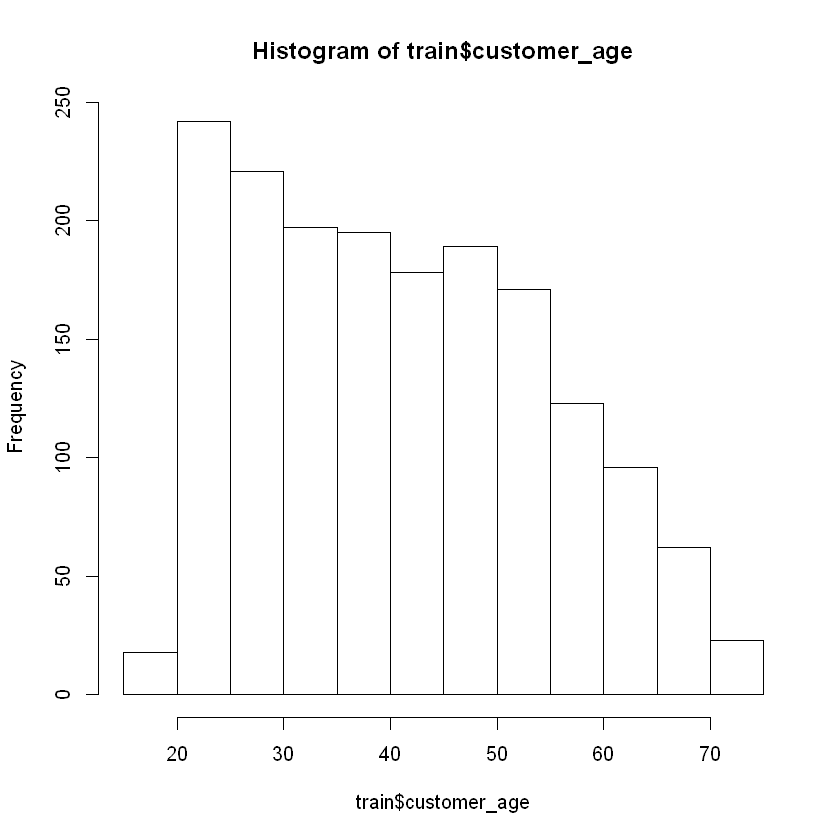

In [6]:
hist(train$customer_age)

In [7]:
train[train$customer_age<30, age_bin:="Young"]
train[(train$customer_age>=30) & (train$customer_age<50), age_bin:="Mid"]
train[train$customer_age>=50, age_bin:="Old"]

In [8]:
train[train$default==1, target:="Class_1"]
train[train$default==0, target:="Class_0"]

In [9]:
cols = c("target", "Var_39", "Var_53", "age_bin")
train[,(cols):=lapply(.SD, as.factor),.SDcols=cols]

In [10]:
summary(train)

 loan_application_id  loan_amount      default        customer_age  
 Min.   :   1.0      Min.   : 771   Min.   :0.0000   Min.   :19.00  
 1st Qu.: 617.5      1st Qu.:1969   1st Qu.:0.0000   1st Qu.:29.00  
 Median :1263.0      Median :2677   Median :0.0000   Median :40.00  
 Mean   :1273.2      Mean   :2949   Mean   :0.1003   Mean   :41.32  
 3rd Qu.:1934.0      3rd Qu.:3763   3rd Qu.:0.0000   3rd Qu.:52.00  
 Max.   :2562.0      Max.   :7994   Max.   :1.0000   Max.   :74.00  
     Var_1           Var_2            Var_3           Var_4       
 Min.   :0.000   Min.   : 0.000   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:1.000   1st Qu.: 0.000   1st Qu.: 0.00   1st Qu.: 32.00  
 Median :2.000   Median : 1.000   Median : 1.00   Median : 68.00  
 Mean   :2.433   Mean   : 1.171   Mean   : 2.83   Mean   : 76.85  
 3rd Qu.:3.000   3rd Qu.: 2.000   3rd Qu.: 4.00   3rd Qu.:109.00  
 Max.   :9.000   Max.   :27.000   Max.   :50.00   Max.   :301.00  
     Var_5            Var_6            Var_7    

In [11]:
describe(train)

train 

 65  Variables      1715  Observations
--------------------------------------------------------------------------------
loan_application_id 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1715        0     1715        1     1273      865    123.7    254.4 
     .25      .50      .75      .90      .95 
   617.5   1263.0   1934.0   2327.2   2439.6 

lowest :    1    2    3    4    5, highest: 2556 2559 2560 2561 2562
--------------------------------------------------------------------------------
loan_amount 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
    1715        0     1467        1     2949     1437     1280     1447 
     .25      .50      .75      .90      .95 
    1969     2677     3763     4295     5604 

lowest :  771  790  806  821  823, highest: 7857 7925 7952 7989 7994
--------------------------------------------------------------------------------
default 
       n  missing distinct     Info      Sum     Me

In [12]:
any(is.na(train))

[1] FALSE

## Dimensionality Reduction & Scaling

In [13]:
str(train)

Classes 'data.table' and 'data.frame':	1715 obs. of  65 variables:
 $ loan_application_id: int  1 2 3 4 5 7 8 10 11 12 ...
 $ loan_amount        : num  2855 1577 6858 2434 4964 ...
 $ default            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ customer_age       : int  25 53 39 49 47 44 53 37 51 40 ...
 $ Var_1              : int  3 0 4 3 2 1 9 1 1 1 ...
 $ Var_2              : int  1 0 2 1 1 0 1 0 0 0 ...
 $ Var_3              : int  1 0 3 3 1 1 3 0 2 2 ...
 $ Var_4              : int  37 0 55 98 110 37 245 67 32 68 ...
 $ Var_5              : int  41 26 58 98 124 37 245 74 56 78 ...
 $ Var_6              : int  5 2 10 11 15 5 32 5 15 5 ...
 $ Var_7              : int  5 2 10 11 15 5 32 5 15 5 ...
 $ Var_8              : int  1330 1478 1060 1218 1334 1622 1349 1728 1008 1116 ...
 $ Var_9              : int  1 1 3 4 4 1 16 2 8 2 ...
 $ Var_10             : int  4 1 4 7 6 2 17 2 9 4 ...
 $ Var_11             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Var_12             : int  0 0 0 0 0 0 0 0 0 0 ...
 $

In [14]:
# get numeric columns
num_train = train[, -c("loan_application_id", "default", "customer_age", "Var_39", "Var_53", "age_bin", "target")]

In [15]:
set.seed(1)
pca <- princomp(num_train, cor=T)
summary(pca, loadings=T)

Importance of components:
                          Comp.1     Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     3.8733775 2.34417804 2.25147201 1.83432270 1.80161437
Proportion of Variance 0.2586733 0.09474432 0.08739873 0.05801275 0.05596232
Cumulative Proportion  0.2586733 0.35341765 0.44081638 0.49882914 0.55479145
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     1.63770709 1.41927514 1.33267726 1.25336706 1.22523186
Proportion of Variance 0.04624284 0.03473003 0.03062118 0.02708498 0.02588264
Cumulative Proportion  0.60103429 0.63576432 0.66638551 0.69347049 0.71935313
                          Comp.11    Comp.12    Comp.13    Comp.14    Comp.15
Standard deviation     1.12894362 1.07230205 1.04005574 1.01739318 1.00567564
Proportion of Variance 0.02197437 0.01982468 0.01865027 0.01784636 0.01743765
Cumulative Proportion  0.74132750 0.76115219 0.77980246 0.79764882 0.81508647
                          Comp.16    Comp.

In [16]:
pca_result = pca$scores[,c(1:38)]

In [17]:
# scale numeric columns
preProcValues <- preProcess(pca_result, method = c("center", "scale"))
preProcValues

Created from 1715 samples and 38 variables

Pre-processing:
  - centered (38)
  - ignored (0)
  - scaled (38)


In [18]:
pca_results_scaled <- predict(preProcValues, pca_result)

In [19]:
summary(pca_results_scaled)

     Comp.1            Comp.2              Comp.3              Comp.4         
 Min.   :-1.2902   Min.   :-5.695970   Min.   :-27.29443   Min.   :-11.45463  
 1st Qu.:-0.7006   1st Qu.:-0.475986   1st Qu.: -0.40671   1st Qu.: -0.53821  
 Median :-0.2406   Median : 0.009549   Median : -0.06021   Median : -0.01869  
 Mean   : 0.0000   Mean   : 0.000000   Mean   :  0.00000   Mean   :  0.00000  
 3rd Qu.: 0.4345   3rd Qu.: 0.430370   3rd Qu.:  0.39366   3rd Qu.:  0.55466  
 Max.   :12.7059   Max.   : 6.768188   Max.   :  4.71641   Max.   :  5.71466  
     Comp.5            Comp.6             Comp.7             Comp.8         
 Min.   :-4.7091   Min.   :-7.48451   Min.   :-5.60663   Min.   :-7.541640  
 1st Qu.:-0.4371   1st Qu.:-0.19757   1st Qu.:-0.33323   1st Qu.:-0.400083  
 Median : 0.1601   Median : 0.09628   Median :-0.05829   Median : 0.009577  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.000000  
 3rd Qu.: 0.5375   3rd Qu.: 0.43649   3rd Qu.: 0.22306   3rd Q

In [20]:
# add other columns to scaled numerical columns obtained from PCA
train_pca = train[, c("target", "loan_amount", "age_bin", "Var_39", "Var_53")]
train_pca = cbind(train_pca, pca_result)

In [21]:
train_pca

target,loan_amount,age_bin,Var_39,Var_53,Comp.1,Comp.2,Comp.3,Comp.4,Comp.5,...,Comp.29,Comp.30,Comp.31,Comp.32,Comp.33,Comp.34,Comp.35,Comp.36,Comp.37,Comp.38
Class_0,2855.0,Young,N,N,-3.2830643,-1.11473246,-0.03634300,-0.0839926188,1.10182930,...,0.13195609,-0.45618043,0.236074589,0.052303258,0.336626914,0.1923539835,-0.172572210,-0.01926985,0.20848417,-0.45856041
Class_0,1577.0,Old,N,N,-4.1096047,-0.46674077,-1.82862739,-0.4217061781,-2.01632918,...,0.21983371,0.19775890,0.075297907,0.174683939,0.332709432,0.0902281685,0.065722236,-0.40891640,-0.05202575,-0.14485534
Class_0,6858.0,Mid,N,N,0.7070552,1.82869416,0.68297149,1.8893137343,0.46172340,...,0.10340322,0.75722076,0.279948994,-0.284466674,0.271954454,-0.0009894290,-0.470990103,-0.02721141,-0.40738065,0.43486261
Class_0,2434.5,Mid,N,N,1.0365594,-0.66721934,1.85941600,0.7729961560,1.80819981,...,0.34505732,-0.16806651,-0.069055196,-0.181685363,0.018752979,-0.2448397188,0.041815349,-0.67296883,-0.05610719,0.43187275
Class_0,4964.0,Mid,N,N,5.7464211,1.87609224,-2.84325672,-0.2688021525,-4.46307009,...,-0.23329253,-0.79006486,-0.395062850,0.285429201,0.283397280,-0.3594967456,0.043872815,0.16756564,0.21551087,0.11024888
Class_0,6899.0,Mid,N,N,-2.0201748,-0.07565775,-2.14265284,-0.2903197951,-2.98354424,...,0.36022140,-0.11748133,-0.200539697,0.317992723,0.175738849,0.0005245091,0.075108968,-0.35092329,0.05700417,-0.13798279
Class_0,6493.0,Old,N,N,14.7791408,6.26068574,8.95005895,0.8313152416,3.98681180,...,-1.13354430,2.44366103,-0.378015229,0.900133519,1.574716440,-0.3710309043,-3.803194951,-1.81433159,-0.51748435,-0.63566020
Class_0,1640.0,Mid,N,N,-2.7768992,-0.18507028,-0.63703799,-1.2301521018,-1.72798613,...,0.25115535,-0.01417583,0.158850496,0.251285086,0.213581031,0.0918947481,0.079539706,-0.24158580,0.04043125,0.07745294
Class_0,1280.5,Old,Y,Y,1.1517289,-3.08734194,-0.91651487,1.7193665764,-1.33146472,...,-0.21956863,0.12424584,-0.235411992,0.186202150,-0.103070538,0.0730360037,0.240232280,-0.15557499,-0.12156113,-0.21820147
Class_0,3021.0,Mid,N,N,-3.2017951,-1.54395263,-0.58628223,-0.3805041617,-0.27737448,...,0.14340269,0.39507971,-0.301992067,0.366374112,0.046918629,-0.2665123127,0.094741116,-0.11554713,0.13058278,-0.43579612


## Predictive

In [22]:
# Add fold ID for cross validation up next
train_pca$fold <- sample(factor(rep(1:10, length.out=nrow(train_pca)), labels=paste0("Fold", 1:10)))

In [23]:
table(train_pca$fold)


 Fold1  Fold2  Fold3  Fold4  Fold5  Fold6  Fold7  Fold8  Fold9 Fold10 
   172    172    172    172    172    171    171    171    171    171 

In [25]:
n_repeats=1
n_folds=2
fitControl=trainControl(method = "repeatedcv",
                        number = n_folds,
                        repeats = n_repeats,
                        classProbs=TRUE, 
                        summaryFunction=twoClassSummary,
                        sampling="up"
                       )
set.seed(1)
ada_fit=train(target ~ ., 
              data = train_pca[, -c("loan_amount", "fold")],
              method = "AdaBoost.M1", 
              trControl = fitControl, 
              metric = "ROC",
              tuneLength = 1)

In [ ]:
ada_fit

In [24]:
# function calculating total money loss due to missclassification
calculate_loss<-function(test_prediction){
    data = test_prediction
    loss_1_df = data[(data$target=="Class_1") & (data$pred=="Class_0"),]
    if(nrow(loss_1_df)==0){loss_1=0}
    if(nrow(loss_1_df)>0){loss_1=sum(loss_1_df$loan_amount)}
    loss_2_df = data[(data$target=="Class_0") & (data$pred=="Class_1"),]
    if(nrow(loss_2_df)==0){loss_2=0}
    if(nrow(loss_2_df)>0){loss_2=sum(loss_2_df$loan_amount)*0.15}
    money_loss = loss_1 + loss_2
    money_loss 
}

loan_amount is not used as a feature since it is also used as an input for PCA

### CART

In [25]:
set.seed(1)
cart_cv_list = {}
for (cp in c(0:10)*0.05){ # parameter grid
    fitControl=trainControl(method = "cv",
                            number = 2, # inner, 2 fold cv
                            classProbs=TRUE, 
                            summaryFunction=twoClassSummary,
                            sampling="up") # over-sampling
    cart_grid = expand.grid(cp=cp)
    for (k in c(1:10)){ # 10 fold cv to calculate average money loss
        fld = paste0("Fold", k)
        trn = train_pca[train_pca$fold!=fld]
        tst = train_pca[train_pca$fold==fld]
        tree_fit=train(target ~ ., 
                       data = trn[, -c("fold", "loan_amount")],
                       method = "rpart", 
                       trControl = fitControl, 
                       metric = "ROC",
                       tuneGrid=cart_grid)
        pred = predict(tree_fit, tst[, -c("fold", "loan_amount")])
        tst = cbind(tst, pred)
        loss_per_row = calculate_loss(tst) / nrow(tst) # average money loss on one fold
        auc = tree_fit$results["ROC"]
        sensitivity = tree_fit$results["Sens"]
        specificity = tree_fit$results["Spec"]
        cart_cv_list = rbind(cbind(cp, fld, loss_per_row, auc, sensitivity, specificity), cart_cv_list)
    }
}

In [26]:
cart_result = aggregate(cart_cv_list[, 3:6], list(cart_cv_list$cp), mean) # average money loss per row and other averages for each model parameter set

In [27]:
cart_result

Group.1,loss_per_row,ROC,Sens,Spec
0.00,332.6437,0.5670235,0.8471894,0.27801681
0.05,280.8507,0.6459705,0.6735889,0.61436074
0.10,269.1962,0.6504062,0.5571197,0.74369263
0.15,271.8561,0.6419277,0.5992822,0.68457324
0.20,270.2667,0.6401168,0.5603209,0.71991282
0.25,268.1821,0.6345043,0.6300736,0.63893496
0.30,272.5813,0.6484541,0.5767217,0.72018656
0.35,325.1407,0.5750788,0.7538743,0.39628332
0.40,339.4738,0.5267650,0.9238897,0.12964032
0.45,339.4738,0.5064335,0.9784075,0.03445946


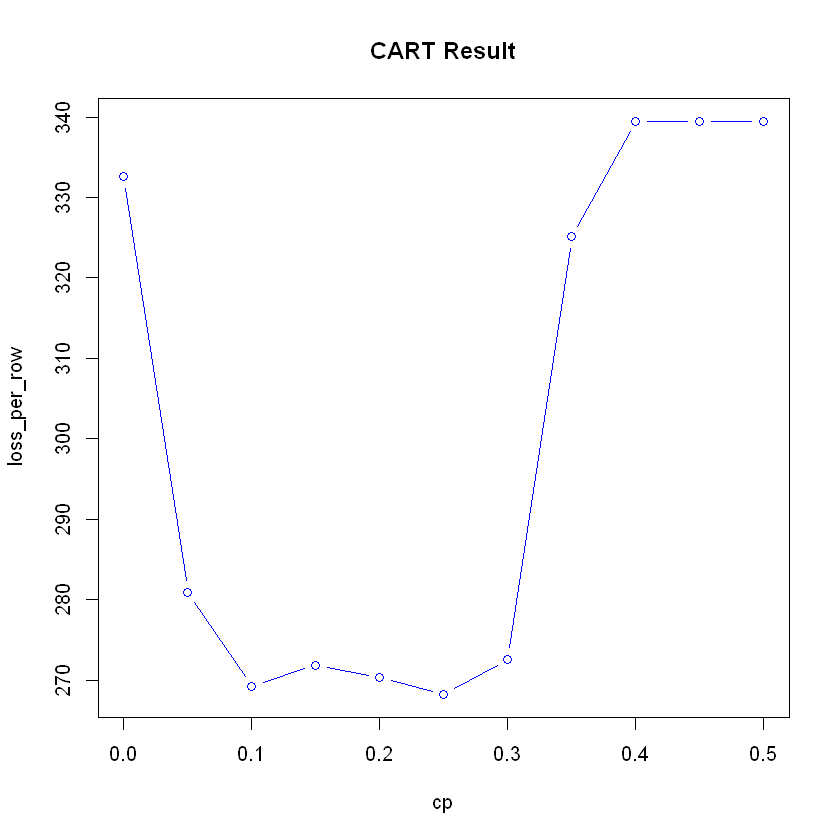

In [28]:
plot(cart_result[,1:2], "cp", type = "b", col="blue", main="CART Result")

min loss = 268.1821 with cp = 0.25

### Lasso Regression

In [29]:
set.seed(1)
lasso_cv_list={}
for (lambda in seq(0,0.05,by = 0.0025)){
    fitControl=trainControl(method = "cv",
                            number = 2,
                            classProbs=TRUE, 
                            summaryFunction=twoClassSummary,
                            sampling="up")
    lasso_grid = expand.grid(alpha = 1, lambda=lambda)
    for (k in c(1:10)){
        fld = paste0("Fold", k)
        trn = train_pca[train_pca$fold!=fld]
        tst = train_pca[train_pca$fold==fld]
        lasso_fit=train(target ~ ., 
                       data = trn[, -c("fold", "loan_amount")],
                       method = "glmnet", 
                       trControl = fitControl, 
                       metric = "ROC",
                       tuneGrid=lasso_grid)
        pred = predict(lasso_fit, tst[, -c("fold", "loan_amount")])
        tst = cbind(tst, pred)
        loss_per_row = calculate_loss(tst) / nrow(tst)
        auc = lasso_fit$results["ROC"]
        sensitivity = lasso_fit$results["Sens"]
        specificity = lasso_fit$results["Spec"]
        lasso_cv_list = rbind(cbind(lambda, fld, loss_per_row, auc, sensitivity, specificity), lasso_cv_list)
    }
}

In [30]:
lasso_result = aggregate(lasso_cv_list[, 3:6], list(lasso_cv_list$lambda), mean)

In [31]:
lasso_result

Group.1,loss_per_row,ROC,Sens,Spec
0.0000,225.1076,0.7317797,0.7470251,0.6081881
0.0025,226.9598,0.7405266,0.7441592,0.6253996
0.0050,227.8464,0.7418648,0.7396063,0.6349350
0.0075,232.4623,0.7488466,0.7451375,0.6358786
0.0100,220.2185,0.7412214,0.7417829,0.6276486
0.0125,216.3386,0.7541285,0.7412703,0.6616466
0.0150,216.4750,0.7579131,0.7412027,0.6412207
0.0175,218.8717,0.7470253,0.7419189,0.6370242
0.0200,221.4329,0.7484345,0.7444470,0.6185374
0.0225,214.4883,0.7421442,0.7424226,0.6267354


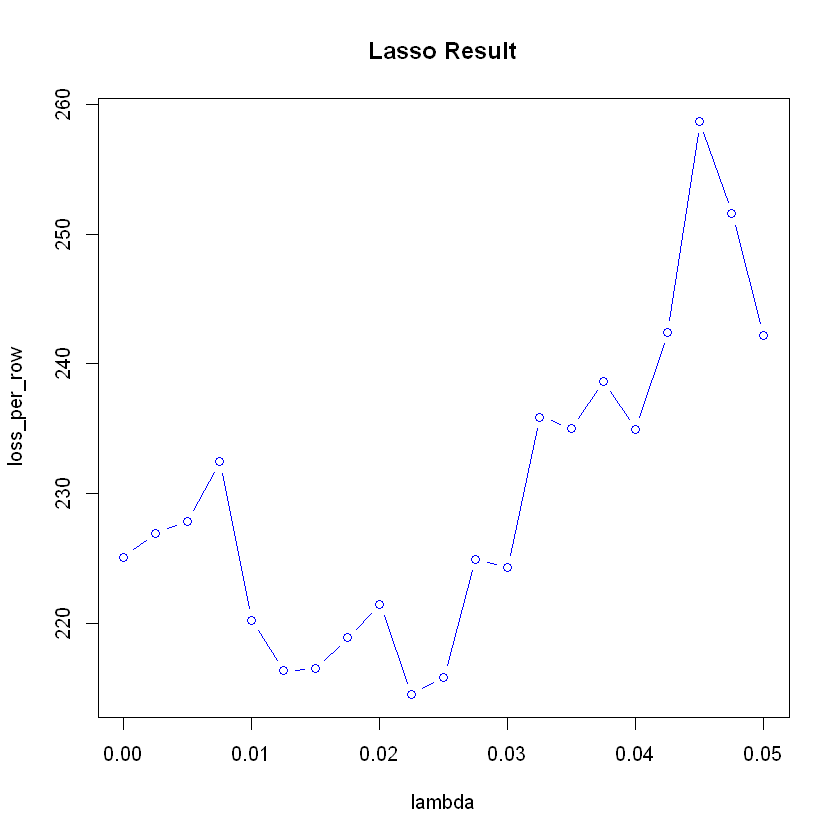

In [32]:
plot(lasso_result[,1:2], "lambda", type = "b", col="blue", main="Lasso Result")

min loss = 214.4883, with lambda = 0.0225

### GBM

In [33]:
set.seed(1)
gbm_cv_list={}
for (depth in c(4, 5)){for (ntree in c(100, 300, 500, 700)){for (learn_rate in c(0.01, 0.005)){
    fitControl=trainControl(method = "cv",
                            number = 2,
                            classProbs=TRUE, 
                            summaryFunction=twoClassSummary,
                            sampling="up")
    gbm_grid = expand.grid(interaction.depth=depth, n.trees=ntree, shrinkage=learn_rate, n.minobsinnode = 5)
    for (k in c(1:10)){
        fld = paste0("Fold", k)
        trn = train_pca[train_pca$fold!=fld]
        tst = train_pca[train_pca$fold==fld]
        gbm_fit=train(target ~ ., 
                       data = trn[, -c("loan_amount", "fold")],
                       method = "gbm", 
                       trControl = fitControl, 
                       metric = "ROC",
                       tuneGrid=gbm_grid)
        pred = predict(gbm_fit, tst[, -c("loan_amount", "fold")])
        tst = cbind(tst, pred)
        loss_per_row = calculate_loss(tst) / nrow(tst)
        auc = gbm_fit$results["ROC"]
        sensitivity = gbm_fit$results["Sens"]
        specificity = gbm_fit$results["Spec"]
        gbm_cv_list = rbind(cbind(depth, ntree, learn_rate, fld, loss_per_row, auc, sensitivity, specificity), gbm_cv_list)
    }
}}}

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3808             nan     0.0100    0.0024
     2        1.3755             nan     0.0100    0.0026
     3        1.3700             nan     0.0100    0.0025
     4        1.3646             nan     0.0100    0.0026
     5        1.3593             nan     0.0100    0.0026
     6        1.3539             nan     0.0100    0.0027
     7        1.3485             nan     0.0100    0.0025
     8        1.3431             nan     0.0100    0.0026
     9        1.3377             nan     0.0100    0.0022
    10        1.3325             nan     0.0100    0.0024
    20        1.2865             nan     0.0100    0.0019
    40        1.2118             nan     0.0100    0.0015
    60        1.1509             nan     0.0100    0.0013
    80        1.0953             nan     0.0100    0.0010
   100        1.0467             nan     0.0100    0.0008

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3805             nan     0.0100    0.0027
     2        1.3750             nan     0.0100    0.0027
     3        1.3700             nan     0.0100    0.0023
     4        1.3643             nan     0.0100    0.0026
     5        1.3587             nan     0.0100    0.0027
     6        1.3538             nan     0.0100    0.0024
     7        1.3485             nan     0.0100    0.0024
     8        1.3438             nan     0.0100    0.0022
     9        1.3384             nan     0.0100    0.0023
    10        1.3331             nan     0.0100    0.0025
    20        1.2863             nan     0.0100    0.0019
    40        1.2101             nan     0.0100    0.0015
    60        1.1467             nan     0.0100    0.0012
    80        1.0901             nan     0.0100    0.0010
   100        1.0437             nan     0.0100    0.0010

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3802             nan     0.0100    0.0028
     2        1.3746             nan     0.0100    0.0026
     3        1.3690             nan     0.0100    0.0026
     4        1.3634             nan     0.0100    0.0027
     5        1.3581             nan     0.0100    0.0024
     6        1.3530             nan     0.0100    0.0022
     7        1.3477             nan     0.0100    0.0023
     8        1.3428             nan     0.0100    0.0024
     9        1.3374             nan     0.0100    0.0025
    10        1.3333             nan     0.0100    0.0018
    20        1.2862             nan     0.0100    0.0021
    40        1.2087             nan     0.0100    0.0017
    60        1.1433             nan     0.0100    0.0012
    80        1.0856             nan     0.0100    0.0012
   100        1.0337             nan     0.0100    0.0013

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3811             nan     0.0100    0.0025
     2        1.3757             nan     0.0100    0.0026
     3        1.3708             nan     0.0100    0.0023
     4        1.3658             nan     0.0100    0.0025
     5        1.3608             nan     0.0100    0.0022
     6        1.3555             nan     0.0100    0.0025
     7        1.3509             nan     0.0100    0.0021
     8        1.3457             nan     0.0100    0.0024
     9        1.3409             nan     0.0100    0.0023
    10        1.3359             nan     0.0100    0.0022
    20        1.2894             nan     0.0100    0.0024
    40        1.2067             nan     0.0100    0.0017
    60        1.1372             nan     0.0100    0.0009
    80        1.0732             nan     0.0100    0.0014
   100        1.0166             nan     0.0100    0.0010

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3830             nan     0.0050    0.0015
     2        1.3794             nan     0.0050    0.0017
     3        1.3757             nan     0.0050    0.0018
     4        1.3722             nan     0.0050    0.0017
     5        1.3687             nan     0.0050    0.0016
     6        1.3650             nan     0.0050    0.0018
     7        1.3614             nan     0.0050    0.0017
     8        1.3579             nan     0.0050    0.0017
     9        1.3543             nan     0.0050    0.0017
    10        1.3510             nan     0.0050    0.0016
    20        1.3186             nan     0.0050    0.0015
    40        1.2599             nan     0.0050    0.0013
    60        1.2087             nan     0.0050    0.0012
    80        1.1643             nan     0.0050    0.0010
   100        1.1237             nan     0.0050    0.0009

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3836             nan     0.0050    0.0012
     2        1.3807             nan     0.0050    0.0013
     3        1.3779             nan     0.0050    0.0014
     4        1.3753             nan     0.0050    0.0011
     5        1.3725             nan     0.0050    0.0012
     6        1.3700             nan     0.0050    0.0010
     7        1.3674             nan     0.0050    0.0012
     8        1.3648             nan     0.0050    0.0012
     9        1.3622             nan     0.0050    0.0012
    10        1.3597             nan     0.0050    0.0011
    20        1.3354             nan     0.0050    0.0012
    40        1.2909             nan     0.0050    0.0009
    60        1.2490             nan     0.0050    0.0009
    80        1.2112             nan     0.0050    0.0008
   100        1.1754             nan     0.0050    0.0009

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3835             nan     0.0050    0.0013
     2        1.3808             nan     0.0050    0.0012
     3        1.3780             nan     0.0050    0.0012
     4        1.3753             nan     0.0050    0.0011
     5        1.3724             nan     0.0050    0.0013
     6        1.3697             nan     0.0050    0.0012
     7        1.3669             nan     0.0050    0.0013
     8        1.3641             nan     0.0050    0.0013
     9        1.3616             nan     0.0050    0.0011
    10        1.3591             nan     0.0050    0.0011
    20        1.3341             nan     0.0050    0.0011
    40        1.2882             nan     0.0050    0.0009
    60        1.2484             nan     0.0050    0.0008
    80        1.2122             nan     0.0050    0.0009
   100        1.1786             nan     0.0050    0.0006

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3805             nan     0.0100    0.0027
     2        1.3744             nan     0.0100    0.0030
     3        1.3689             nan     0.0100    0.0026
     4        1.3637             nan     0.0100    0.0024
     5        1.3580             nan     0.0100    0.0025
     6        1.3528             nan     0.0100    0.0026
     7        1.3479             nan     0.0100    0.0021
     8        1.3425             nan     0.0100    0.0027
     9        1.3380             nan     0.0100    0.0021
    10        1.3325             nan     0.0100    0.0024
    20        1.2832             nan     0.0100    0.0020
    40        1.2007             nan     0.0100    0.0019
    60        1.1342             nan     0.0100    0.0012
    80        1.0762             nan     0.0100    0.0011
   100        1.0246             nan     0.0100    0.0009
   120        0.9792             nan     0.0100    0.0009
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3800             nan     0.0100    0.0029
     2        1.3739             nan     0.0100    0.0030
     3        1.3675             nan     0.0100    0.0028
     4        1.3614             nan     0.0100    0.0028
     5        1.3558             nan     0.0100    0.0024
     6        1.3503             nan     0.0100    0.0021
     7        1.3446             nan     0.0100    0.0027
     8        1.3389             nan     0.0100    0.0027
     9        1.3333             nan     0.0100    0.0026
    10        1.3275             nan     0.0100    0.0025
    20        1.2769             nan     0.0100    0.0022
    40        1.1911             nan     0.0100    0.0014
    60        1.1205             nan     0.0100    0.0014
    80        1.0580             nan     0.0100    0.0014
   100        1.0057             nan     0.0100    0.0011
   120        0.9564             nan     0.0100    0.0008
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3808             nan     0.0100    0.0023
     2        1.3758             nan     0.0100    0.0023
     3        1.3707             nan     0.0100    0.0023
     4        1.3652             nan     0.0100    0.0026
     5        1.3599             nan     0.0100    0.0025
     6        1.3548             nan     0.0100    0.0023
     7        1.3502             nan     0.0100    0.0021
     8        1.3451             nan     0.0100    0.0022
     9        1.3401             nan     0.0100    0.0023
    10        1.3356             nan     0.0100    0.0021
    20        1.2908             nan     0.0100    0.0019
    40        1.2176             nan     0.0100    0.0014
    60        1.1555             nan     0.0100    0.0011
    80        1.1019             nan     0.0100    0.0011
   100        1.0508             nan     0.0100    0.0010
   120        1.0069             nan     0.0100    0.0009
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3804             nan     0.0100    0.0029
     2        1.3742             nan     0.0100    0.0029
     3        1.3687             nan     0.0100    0.0025
     4        1.3634             nan     0.0100    0.0023
     5        1.3581             nan     0.0100    0.0025
     6        1.3523             nan     0.0100    0.0026
     7        1.3467             nan     0.0100    0.0024
     8        1.3420             nan     0.0100    0.0021
     9        1.3369             nan     0.0100    0.0026
    10        1.3319             nan     0.0100    0.0022
    20        1.2848             nan     0.0100    0.0022
    40        1.2035             nan     0.0100    0.0018
    60        1.1349             nan     0.0100    0.0014
    80        1.0770             nan     0.0100    0.0010
   100        1.0254             nan     0.0100    0.0008
   120        0.9781             nan     0.0100    0.0012
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3809             nan     0.0100    0.0025
     2        1.3755             nan     0.0100    0.0025
     3        1.3708             nan     0.0100    0.0021
     4        1.3658             nan     0.0100    0.0023
     5        1.3612             nan     0.0100    0.0019
     6        1.3556             nan     0.0100    0.0024
     7        1.3504             nan     0.0100    0.0024
     8        1.3445             nan     0.0100    0.0027
     9        1.3398             nan     0.0100    0.0021
    10        1.3342             nan     0.0100    0.0027
    20        1.2889             nan     0.0100    0.0017
    40        1.2087             nan     0.0100    0.0012
    60        1.1401             nan     0.0100    0.0013
    80        1.0788             nan     0.0100    0.0013
   100        1.0253             nan     0.0100    0.0009
   120        0.9761             nan     0.0100    0.0010
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3838             nan     0.0050    0.0011
     2        1.3813             nan     0.0050    0.0011
     3        1.3789             nan     0.0050    0.0011
     4        1.3765             nan     0.0050    0.0010
     5        1.3739             nan     0.0050    0.0011
     6        1.3715             nan     0.0050    0.0011
     7        1.3692             nan     0.0050    0.0010
     8        1.3666             nan     0.0050    0.0013
     9        1.3640             nan     0.0050    0.0012
    10        1.3614             nan     0.0050    0.0011
    20        1.3373             nan     0.0050    0.0010
    40        1.2945             nan     0.0050    0.0009
    60        1.2542             nan     0.0050    0.0009
    80        1.2172             nan     0.0050    0.0008
   100        1.1843             nan     0.0050    0.0007
   120        1.1535             nan     0.0050    0.0006
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3829             nan     0.0050    0.0017
     2        1.3794             nan     0.0050    0.0015
     3        1.3760             nan     0.0050    0.0015
     4        1.3726             nan     0.0050    0.0016
     5        1.3692             nan     0.0050    0.0016
     6        1.3659             nan     0.0050    0.0016
     7        1.3627             nan     0.0050    0.0014
     8        1.3596             nan     0.0050    0.0015
     9        1.3562             nan     0.0050    0.0015
    10        1.3529             nan     0.0050    0.0016
    20        1.3215             nan     0.0050    0.0015
    40        1.2660             nan     0.0050    0.0013
    60        1.2171             nan     0.0050    0.0011
    80        1.1745             nan     0.0050    0.0009
   100        1.1358             nan     0.0050    0.0009
   120        1.1003             nan     0.0050    0.0007
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3836             nan     0.0050    0.0012
     2        1.3808             nan     0.0050    0.0013
     3        1.3785             nan     0.0050    0.0009
     4        1.3761             nan     0.0050    0.0011
     5        1.3733             nan     0.0050    0.0013
     6        1.3707             nan     0.0050    0.0012
     7        1.3685             nan     0.0050    0.0009
     8        1.3659             nan     0.0050    0.0012
     9        1.3635             nan     0.0050    0.0011
    10        1.3610             nan     0.0050    0.0011
    20        1.3376             nan     0.0050    0.0011
    40        1.2921             nan     0.0050    0.0009
    60        1.2523             nan     0.0050    0.0009
    80        1.2164             nan     0.0050    0.0007
   100        1.1839             nan     0.0050    0.0007
   120        1.1531             nan     0.0050    0.0005
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3837             nan     0.0050    0.0013
     2        1.3810             nan     0.0050    0.0013
     3        1.3784             nan     0.0050    0.0013
     4        1.3759             nan     0.0050    0.0013
     5        1.3732             nan     0.0050    0.0013
     6        1.3706             nan     0.0050    0.0012
     7        1.3683             nan     0.0050    0.0010
     8        1.3655             nan     0.0050    0.0014
     9        1.3629             nan     0.0050    0.0012
    10        1.3607             nan     0.0050    0.0010
    20        1.3365             nan     0.0050    0.0010
    40        1.2921             nan     0.0050    0.0011
    60        1.2516             nan     0.0050    0.0009
    80        1.2175             nan     0.0050    0.0007
   100        1.1861             nan     0.0050    0.0006
   120        1.1579             nan     0.0050    0.0004
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3834             nan     0.0050    0.0012
     2        1.3800             nan     0.0050    0.0016
     3        1.3770             nan     0.0050    0.0014
     4        1.3737             nan     0.0050    0.0014
     5        1.3705             nan     0.0050    0.0015
     6        1.3678             nan     0.0050    0.0013
     7        1.3648             nan     0.0050    0.0014
     8        1.3617             nan     0.0050    0.0015
     9        1.3589             nan     0.0050    0.0012
    10        1.3562             nan     0.0050    0.0013
    20        1.3281             nan     0.0050    0.0010
    40        1.2780             nan     0.0050    0.0012
    60        1.2330             nan     0.0050    0.0009
    80        1.1923             nan     0.0050    0.0010
   100        1.1554             nan     0.0050    0.0007
   120        1.1220             nan     0.0050    0.0007
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3807             nan     0.0100    0.0028
     2        1.3746             nan     0.0100    0.0029
     3        1.3693             nan     0.0100    0.0024
     4        1.3646             nan     0.0100    0.0019
     5        1.3595             nan     0.0100    0.0023
     6        1.3544             nan     0.0100    0.0023
     7        1.3494             nan     0.0100    0.0022
     8        1.3444             nan     0.0100    0.0025
     9        1.3391             nan     0.0100    0.0025
    10        1.3341             nan     0.0100    0.0023
    20        1.2895             nan     0.0100    0.0020
    40        1.2130             nan     0.0100    0.0014
    60        1.1500             nan     0.0100    0.0008
    80        1.0930             nan     0.0100    0.0011
   100        1.0463             nan     0.0100    0.0008
   120        1.0016             nan     0.0100    0.0009
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3797             nan     0.0100    0.0031
     2        1.3736             nan     0.0100    0.0027
     3        1.3678             nan     0.0100    0.0026
     4        1.3617             nan     0.0100    0.0027
     5        1.3561             nan     0.0100    0.0027
     6        1.3509             nan     0.0100    0.0025
     7        1.3456             nan     0.0100    0.0026
     8        1.3403             nan     0.0100    0.0023
     9        1.3339             nan     0.0100    0.0029
    10        1.3283             nan     0.0100    0.0023
    20        1.2758             nan     0.0100    0.0023
    40        1.1885             nan     0.0100    0.0018
    60        1.1179             nan     0.0100    0.0015
    80        1.0583             nan     0.0100    0.0013
   100        1.0085             nan     0.0100    0.0009
   120        0.9646             nan     0.0100    0.0007
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3798             nan     0.0100    0.0030
     2        1.3738             nan     0.0100    0.0024
     3        1.3671             nan     0.0100    0.0031
     4        1.3611             nan     0.0100    0.0030
     5        1.3544             nan     0.0100    0.0032
     6        1.3482             nan     0.0100    0.0028
     7        1.3420             nan     0.0100    0.0030
     8        1.3360             nan     0.0100    0.0030
     9        1.3297             nan     0.0100    0.0030
    10        1.3238             nan     0.0100    0.0025
    20        1.2707             nan     0.0100    0.0024
    40        1.1799             nan     0.0100    0.0020
    60        1.1056             nan     0.0100    0.0012
    80        1.0414             nan     0.0100    0.0015
   100        0.9871             nan     0.0100    0.0012
   120        0.9389             nan     0.0100    0.0010
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3807             nan     0.0100    0.0029
     2        1.3751             nan     0.0100    0.0028
     3        1.3694             nan     0.0100    0.0028
     4        1.3634             nan     0.0100    0.0027
     5        1.3584             nan     0.0100    0.0023
     6        1.3531             nan     0.0100    0.0025
     7        1.3476             nan     0.0100    0.0026
     8        1.3422             nan     0.0100    0.0026
     9        1.3368             nan     0.0100    0.0025
    10        1.3312             nan     0.0100    0.0027
    20        1.2844             nan     0.0100    0.0021
    40        1.2063             nan     0.0100    0.0015
    60        1.1427             nan     0.0100    0.0016
    80        1.0883             nan     0.0100    0.0012
   100        1.0394             nan     0.0100    0.0010
   120        0.9962             nan     0.0100    0.0008
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3801             nan     0.0100    0.0029
     2        1.3745             nan     0.0100    0.0026
     3        1.3691             nan     0.0100    0.0025
     4        1.3642             nan     0.0100    0.0021
     5        1.3593             nan     0.0100    0.0023
     6        1.3538             nan     0.0100    0.0026
     7        1.3487             nan     0.0100    0.0023
     8        1.3430             nan     0.0100    0.0025
     9        1.3385             nan     0.0100    0.0020
    10        1.3335             nan     0.0100    0.0020
    20        1.2901             nan     0.0100    0.0019
    40        1.2131             nan     0.0100    0.0014
    60        1.1443             nan     0.0100    0.0013
    80        1.0862             nan     0.0100    0.0013
   100        1.0334             nan     0.0100    0.0010
   120        0.9857             nan     0.0100    0.0009
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3830             nan     0.0050    0.0014
     2        1.3801             nan     0.0050    0.0013
     3        1.3772             nan     0.0050    0.0013
     4        1.3742             nan     0.0050    0.0014
     5        1.3712             nan     0.0050    0.0013
     6        1.3682             nan     0.0050    0.0014
     7        1.3649             nan     0.0050    0.0015
     8        1.3620             nan     0.0050    0.0014
     9        1.3592             nan     0.0050    0.0013
    10        1.3562             nan     0.0050    0.0015
    20        1.3279             nan     0.0050    0.0013
    40        1.2783             nan     0.0050    0.0010
    60        1.2324             nan     0.0050    0.0009
    80        1.1919             nan     0.0050    0.0008
   100        1.1529             nan     0.0050    0.0009
   120        1.1181             nan     0.0050    0.0007
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3829             nan     0.0050    0.0016
     2        1.3799             nan     0.0050    0.0015
     3        1.3769             nan     0.0050    0.0013
     4        1.3741             nan     0.0050    0.0013
     5        1.3710             nan     0.0050    0.0015
     6        1.3679             nan     0.0050    0.0014
     7        1.3652             nan     0.0050    0.0013
     8        1.3621             nan     0.0050    0.0013
     9        1.3593             nan     0.0050    0.0012
    10        1.3563             nan     0.0050    0.0014
    20        1.3292             nan     0.0050    0.0013
    40        1.2799             nan     0.0050    0.0011
    60        1.2355             nan     0.0050    0.0011
    80        1.1963             nan     0.0050    0.0009
   100        1.1617             nan     0.0050    0.0008
   120        1.1291             nan     0.0050    0.0007
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3833             nan     0.0050    0.0013
     2        1.3804             nan     0.0050    0.0012
     3        1.3779             nan     0.0050    0.0011
     4        1.3752             nan     0.0050    0.0012
     5        1.3727             nan     0.0050    0.0011
     6        1.3701             nan     0.0050    0.0013
     7        1.3673             nan     0.0050    0.0013
     8        1.3647             nan     0.0050    0.0012
     9        1.3622             nan     0.0050    0.0011
    10        1.3598             nan     0.0050    0.0010
    20        1.3341             nan     0.0050    0.0012
    40        1.2901             nan     0.0050    0.0009
    60        1.2494             nan     0.0050    0.0010
    80        1.2119             nan     0.0050    0.0008
   100        1.1779             nan     0.0050    0.0006
   120        1.1462             nan     0.0050    0.0007
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3835             nan     0.0050    0.0012
     2        1.3809             nan     0.0050    0.0010
     3        1.3783             nan     0.0050    0.0012
     4        1.3756             nan     0.0050    0.0011
     5        1.3729             nan     0.0050    0.0013
     6        1.3707             nan     0.0050    0.0011
     7        1.3682             nan     0.0050    0.0012
     8        1.3655             nan     0.0050    0.0012
     9        1.3628             nan     0.0050    0.0012
    10        1.3603             nan     0.0050    0.0012
    20        1.3364             nan     0.0050    0.0010
    40        1.2927             nan     0.0050    0.0008
    60        1.2537             nan     0.0050    0.0009
    80        1.2179             nan     0.0050    0.0008
   100        1.1854             nan     0.0050    0.0005
   120        1.1554             nan     0.0050    0.0006
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3833             nan     0.0050    0.0014
     2        1.3802             nan     0.0050    0.0015
     3        1.3773             nan     0.0050    0.0013
     4        1.3743             nan     0.0050    0.0014
     5        1.3714             nan     0.0050    0.0014
     6        1.3685             nan     0.0050    0.0014
     7        1.3657             nan     0.0050    0.0013
     8        1.3627             nan     0.0050    0.0014
     9        1.3597             nan     0.0050    0.0014
    10        1.3568             nan     0.0050    0.0013
    20        1.3297             nan     0.0050    0.0012
    40        1.2800             nan     0.0050    0.0011
    60        1.2356             nan     0.0050    0.0009
    80        1.1964             nan     0.0050    0.0008
   100        1.1606             nan     0.0050    0.0008
   120        1.1274             nan     0.0050    0.0006
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3811             nan     0.0100    0.0025
     2        1.3753             nan     0.0100    0.0026
     3        1.3706             nan     0.0100    0.0022
     4        1.3651             nan     0.0100    0.0027
     5        1.3599             nan     0.0100    0.0024
     6        1.3552             nan     0.0100    0.0020
     7        1.3505             nan     0.0100    0.0023
     8        1.3452             nan     0.0100    0.0025
     9        1.3406             nan     0.0100    0.0020
    10        1.3360             nan     0.0100    0.0020
    20        1.2897             nan     0.0100    0.0020
    40        1.2126             nan     0.0100    0.0012
    60        1.1477             nan     0.0100    0.0014
    80        1.0904             nan     0.0100    0.0010
   100        1.0412             nan     0.0100    0.0008
   120        0.9984             nan     0.0100    0.0006
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3808             nan     0.0100    0.0026
     2        1.3748             nan     0.0100    0.0026
     3        1.3690             nan     0.0100    0.0026
     4        1.3632             nan     0.0100    0.0026
     5        1.3575             nan     0.0100    0.0027
     6        1.3525             nan     0.0100    0.0022
     7        1.3474             nan     0.0100    0.0024
     8        1.3420             nan     0.0100    0.0025
     9        1.3366             nan     0.0100    0.0023
    10        1.3310             nan     0.0100    0.0024
    20        1.2822             nan     0.0100    0.0020
    40        1.2020             nan     0.0100    0.0016
    60        1.1362             nan     0.0100    0.0013
    80        1.0800             nan     0.0100    0.0010
   100        1.0275             nan     0.0100    0.0010
   120        0.9795             nan     0.0100    0.0010
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3819             nan     0.0100    0.0019
     2        1.3772             nan     0.0100    0.0021
     3        1.3728             nan     0.0100    0.0020
     4        1.3683             nan     0.0100    0.0020
     5        1.3639             nan     0.0100    0.0018
     6        1.3599             nan     0.0100    0.0018
     7        1.3553             nan     0.0100    0.0021
     8        1.3507             nan     0.0100    0.0021
     9        1.3461             nan     0.0100    0.0020
    10        1.3415             nan     0.0100    0.0021
    20        1.3014             nan     0.0100    0.0016
    40        1.2304             nan     0.0100    0.0016
    60        1.1660             nan     0.0100    0.0012
    80        1.1110             nan     0.0100    0.0010
   100        1.0633             nan     0.0100    0.0009
   120        1.0197             nan     0.0100    0.0007
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3799             nan     0.0100    0.0034
     2        1.3736             nan     0.0100    0.0027
     3        1.3677             nan     0.0100    0.0028
     4        1.3616             nan     0.0100    0.0029
     5        1.3554             nan     0.0100    0.0031
     6        1.3494             nan     0.0100    0.0027
     7        1.3435             nan     0.0100    0.0028
     8        1.3380             nan     0.0100    0.0025
     9        1.3323             nan     0.0100    0.0026
    10        1.3267             nan     0.0100    0.0025
    20        1.2751             nan     0.0100    0.0020
    40        1.1881             nan     0.0100    0.0016
    60        1.1187             nan     0.0100    0.0013
    80        1.0618             nan     0.0100    0.0010
   100        1.0128             nan     0.0100    0.0008
   120        0.9695             nan     0.0100    0.0005
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3808             nan     0.0100    0.0026
     2        1.3751             nan     0.0100    0.0028
     3        1.3701             nan     0.0100    0.0023
     4        1.3646             nan     0.0100    0.0024
     5        1.3593             nan     0.0100    0.0024
     6        1.3540             nan     0.0100    0.0026
     7        1.3485             nan     0.0100    0.0023
     8        1.3431             nan     0.0100    0.0024
     9        1.3380             nan     0.0100    0.0023
    10        1.3327             nan     0.0100    0.0022
    20        1.2860             nan     0.0100    0.0020
    40        1.2034             nan     0.0100    0.0017
    60        1.1333             nan     0.0100    0.0015
    80        1.0726             nan     0.0100    0.0012
   100        1.0206             nan     0.0100    0.0012
   120        0.9733             nan     0.0100    0.0008
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3835             nan     0.0050    0.0013
     2        1.3808             nan     0.0050    0.0012
     3        1.3785             nan     0.0050    0.0011
     4        1.3762             nan     0.0050    0.0011
     5        1.3734             nan     0.0050    0.0013
     6        1.3707             nan     0.0050    0.0012
     7        1.3680             nan     0.0050    0.0013
     8        1.3653             nan     0.0050    0.0013
     9        1.3631             nan     0.0050    0.0009
    10        1.3604             nan     0.0050    0.0012
    20        1.3361             nan     0.0050    0.0010
    40        1.2906             nan     0.0050    0.0011
    60        1.2499             nan     0.0050    0.0007
    80        1.2121             nan     0.0050    0.0007
   100        1.1772             nan     0.0050    0.0007
   120        1.1450             nan     0.0050    0.0006
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3830             nan     0.0050    0.0015
     2        1.3801             nan     0.0050    0.0015
     3        1.3770             nan     0.0050    0.0014
     4        1.3741             nan     0.0050    0.0014
     5        1.3712             nan     0.0050    0.0015
     6        1.3680             nan     0.0050    0.0015
     7        1.3650             nan     0.0050    0.0012
     8        1.3621             nan     0.0050    0.0013
     9        1.3594             nan     0.0050    0.0013
    10        1.3566             nan     0.0050    0.0013
    20        1.3290             nan     0.0050    0.0013
    40        1.2807             nan     0.0050    0.0009
    60        1.2371             nan     0.0050    0.0010
    80        1.1978             nan     0.0050    0.0009
   100        1.1635             nan     0.0050    0.0006
   120        1.1301             nan     0.0050    0.0006
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3838             nan     0.0050    0.0012
     2        1.3812             nan     0.0050    0.0013
     3        1.3788             nan     0.0050    0.0010
     4        1.3761             nan     0.0050    0.0012
     5        1.3738             nan     0.0050    0.0010
     6        1.3710             nan     0.0050    0.0012
     7        1.3686             nan     0.0050    0.0012
     8        1.3664             nan     0.0050    0.0009
     9        1.3640             nan     0.0050    0.0012
    10        1.3614             nan     0.0050    0.0012
    20        1.3374             nan     0.0050    0.0011
    40        1.2942             nan     0.0050    0.0008
    60        1.2538             nan     0.0050    0.0007
    80        1.2167             nan     0.0050    0.0006
   100        1.1843             nan     0.0050    0.0007
   120        1.1532             nan     0.0050    0.0005
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3835             nan     0.0050    0.0013
     2        1.3804             nan     0.0050    0.0014
     3        1.3774             nan     0.0050    0.0014
     4        1.3744             nan     0.0050    0.0014
     5        1.3715             nan     0.0050    0.0013
     6        1.3689             nan     0.0050    0.0013
     7        1.3662             nan     0.0050    0.0013
     8        1.3635             nan     0.0050    0.0012
     9        1.3609             nan     0.0050    0.0011
    10        1.3580             nan     0.0050    0.0012
    20        1.3317             nan     0.0050    0.0011
    40        1.2842             nan     0.0050    0.0011
    60        1.2414             nan     0.0050    0.0007
    80        1.2031             nan     0.0050    0.0007
   100        1.1685             nan     0.0050    0.0008
   120        1.1370             nan     0.0050    0.0006
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3833             nan     0.0050    0.0014
     2        1.3804             nan     0.0050    0.0013
     3        1.3773             nan     0.0050    0.0015
     4        1.3743             nan     0.0050    0.0014
     5        1.3711             nan     0.0050    0.0013
     6        1.3682             nan     0.0050    0.0012
     7        1.3653             nan     0.0050    0.0014
     8        1.3625             nan     0.0050    0.0013
     9        1.3598             nan     0.0050    0.0013
    10        1.3570             nan     0.0050    0.0012
    20        1.3300             nan     0.0050    0.0011
    40        1.2808             nan     0.0050    0.0010
    60        1.2373             nan     0.0050    0.0009
    80        1.1970             nan     0.0050    0.0009
   100        1.1596             nan     0.0050    0.0006
   120        1.1258             nan     0.0050    0.0006
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3807             nan     0.0100    0.0024
     2        1.3745             nan     0.0100    0.0026
     3        1.3688             nan     0.0100    0.0028
     4        1.3629             nan     0.0100    0.0028
     5        1.3571             nan     0.0100    0.0025
     6        1.3515             nan     0.0100    0.0025
     7        1.3456             nan     0.0100    0.0028
     8        1.3400             nan     0.0100    0.0024
     9        1.3342             nan     0.0100    0.0026
    10        1.3287             nan     0.0100    0.0024
    20        1.2776             nan     0.0100    0.0022
    40        1.1862             nan     0.0100    0.0020
    60        1.1101             nan     0.0100    0.0016
    80        1.0446             nan     0.0100    0.0011
   100        0.9834             nan     0.0100    0.0013

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3793             nan     0.0100    0.0032
     2        1.3725             nan     0.0100    0.0032
     3        1.3660             nan     0.0100    0.0029
     4        1.3591             nan     0.0100    0.0032
     5        1.3522             nan     0.0100    0.0031
     6        1.3463             nan     0.0100    0.0026
     7        1.3398             nan     0.0100    0.0030
     8        1.3342             nan     0.0100    0.0027
     9        1.3281             nan     0.0100    0.0029
    10        1.3217             nan     0.0100    0.0032
    20        1.2659             nan     0.0100    0.0023
    40        1.1690             nan     0.0100    0.0021
    60        1.0895             nan     0.0100    0.0017
    80        1.0231             nan     0.0100    0.0010
   100        0.9630             nan     0.0100    0.0012

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3796             nan     0.0100    0.0031
     2        1.3732             nan     0.0100    0.0030
     3        1.3674             nan     0.0100    0.0025
     4        1.3622             nan     0.0100    0.0023
     5        1.3571             nan     0.0100    0.0021
     6        1.3508             nan     0.0100    0.0029
     7        1.3448             nan     0.0100    0.0028
     8        1.3393             nan     0.0100    0.0022
     9        1.3337             nan     0.0100    0.0025
    10        1.3276             nan     0.0100    0.0028
    20        1.2756             nan     0.0100    0.0023
    40        1.1873             nan     0.0100    0.0016
    60        1.1131             nan     0.0100    0.0017
    80        1.0493             nan     0.0100    0.0013
   100        0.9920             nan     0.0100    0.0010

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3831             nan     0.0050    0.0014
     2        1.3798             nan     0.0050    0.0016
     3        1.3767             nan     0.0050    0.0014
     4        1.3736             nan     0.0050    0.0015
     5        1.3704             nan     0.0050    0.0014
     6        1.3671             nan     0.0050    0.0014
     7        1.3639             nan     0.0050    0.0015
     8        1.3608             nan     0.0050    0.0016
     9        1.3579             nan     0.0050    0.0012
    10        1.3550             nan     0.0050    0.0013
    20        1.3262             nan     0.0050    0.0013
    40        1.2743             nan     0.0050    0.0009
    60        1.2280             nan     0.0050    0.0010
    80        1.1862             nan     0.0050    0.0010
   100        1.1478             nan     0.0050    0.0008

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3837             nan     0.0050    0.0011
     2        1.3806             nan     0.0050    0.0014
     3        1.3778             nan     0.0050    0.0013
     4        1.3750             nan     0.0050    0.0013
     5        1.3721             nan     0.0050    0.0013
     6        1.3693             nan     0.0050    0.0012
     7        1.3663             nan     0.0050    0.0014
     8        1.3633             nan     0.0050    0.0013
     9        1.3607             nan     0.0050    0.0010
    10        1.3578             nan     0.0050    0.0013
    20        1.3310             nan     0.0050    0.0012
    40        1.2821             nan     0.0050    0.0010
    60        1.2372             nan     0.0050    0.0010
    80        1.1968             nan     0.0050    0.0008
   100        1.1577             nan     0.0050    0.0008

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3829             nan     0.0050    0.0016
     2        1.3797             nan     0.0050    0.0015
     3        1.3764             nan     0.0050    0.0015
     4        1.3731             nan     0.0050    0.0017
     5        1.3698             nan     0.0050    0.0016
     6        1.3666             nan     0.0050    0.0015
     7        1.3632             nan     0.0050    0.0015
     8        1.3599             nan     0.0050    0.0015
     9        1.3564             nan     0.0050    0.0014
    10        1.3533             nan     0.0050    0.0014
    20        1.3229             nan     0.0050    0.0014
    40        1.2672             nan     0.0050    0.0011
    60        1.2170             nan     0.0050    0.0011
    80        1.1711             nan     0.0050    0.0011
   100        1.1303             nan     0.0050    0.0007

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3835             nan     0.0050    0.0013
     2        1.3806             nan     0.0050    0.0013
     3        1.3778             nan     0.0050    0.0014
     4        1.3750             nan     0.0050    0.0013
     5        1.3719             nan     0.0050    0.0014
     6        1.3689             nan     0.0050    0.0013
     7        1.3662             nan     0.0050    0.0012
     8        1.3633             nan     0.0050    0.0014
     9        1.3604             nan     0.0050    0.0015
    10        1.3577             nan     0.0050    0.0011
    20        1.3291             nan     0.0050    0.0013
    40        1.2791             nan     0.0050    0.0011
    60        1.2340             nan     0.0050    0.0010
    80        1.1918             nan     0.0050    0.0009
   100        1.1540             nan     0.0050    0.0008

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1       

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3796             nan     0.0100    0.0031
     2        1.3729             nan     0.0100    0.0032
     3        1.3664             nan     0.0100    0.0031
     4        1.3600             nan     0.0100    0.0030
     5        1.3533             nan     0.0100    0.0032
     6        1.3467             nan     0.0100    0.0029
     7        1.3399             nan     0.0100    0.0030
     8        1.3330             nan     0.0100    0.0030
     9        1.3265             nan     0.0100    0.0031
    10        1.3204             nan     0.0100    0.0029
    20        1.2629             nan     0.0100    0.0024
    40        1.1670             nan     0.0100    0.0019
    60        1.0871             nan     0.0100    0.0015
    80        1.0204             nan     0.0100    0.0014
   100        0.9612             nan     0.0100    0.0010
   120        0.9091             nan     0.0100    0.0010
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3808             nan     0.0100    0.0024
     2        1.3754             nan     0.0100    0.0023
     3        1.3695             nan     0.0100    0.0026
     4        1.3641             nan     0.0100    0.0027
     5        1.3585             nan     0.0100    0.0025
     6        1.3531             nan     0.0100    0.0026
     7        1.3473             nan     0.0100    0.0027
     8        1.3422             nan     0.0100    0.0024
     9        1.3373             nan     0.0100    0.0021
    10        1.3321             nan     0.0100    0.0025
    20        1.2827             nan     0.0100    0.0023
    40        1.1969             nan     0.0100    0.0017
    60        1.1219             nan     0.0100    0.0015
    80        1.0580             nan     0.0100    0.0012
   100        1.0002             nan     0.0100    0.0011
   120        0.9483             nan     0.0100    0.0012
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3799             nan     0.0100    0.0030
     2        1.3741             nan     0.0100    0.0024
     3        1.3681             nan     0.0100    0.0029
     4        1.3618             nan     0.0100    0.0028
     5        1.3561             nan     0.0100    0.0027
     6        1.3502             nan     0.0100    0.0028
     7        1.3442             nan     0.0100    0.0028
     8        1.3390             nan     0.0100    0.0023
     9        1.3331             nan     0.0100    0.0028
    10        1.3271             nan     0.0100    0.0027
    20        1.2744             nan     0.0100    0.0022
    40        1.1867             nan     0.0100    0.0017
    60        1.1148             nan     0.0100    0.0011
    80        1.0482             nan     0.0100    0.0011
   100        0.9915             nan     0.0100    0.0010
   120        0.9408             nan     0.0100    0.0010
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3790             nan     0.0100    0.0036
     2        1.3729             nan     0.0100    0.0029
     3        1.3659             nan     0.0100    0.0034
     4        1.3591             nan     0.0100    0.0032
     5        1.3529             nan     0.0100    0.0024
     6        1.3474             nan     0.0100    0.0024
     7        1.3408             nan     0.0100    0.0028
     8        1.3343             nan     0.0100    0.0032
     9        1.3279             nan     0.0100    0.0028
    10        1.3220             nan     0.0100    0.0028
    20        1.2651             nan     0.0100    0.0024
    40        1.1716             nan     0.0100    0.0016
    60        1.0936             nan     0.0100    0.0017
    80        1.0274             nan     0.0100    0.0011
   100        0.9694             nan     0.0100    0.0012
   120        0.9180             nan     0.0100    0.0010
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3835             nan     0.0050    0.0013
     2        1.3809             nan     0.0050    0.0011
     3        1.3781             nan     0.0050    0.0013
     4        1.3755             nan     0.0050    0.0012
     5        1.3726             nan     0.0050    0.0013
     6        1.3699             nan     0.0050    0.0012
     7        1.3670             nan     0.0050    0.0012
     8        1.3644             nan     0.0050    0.0011
     9        1.3616             nan     0.0050    0.0011
    10        1.3589             nan     0.0050    0.0012
    20        1.3335             nan     0.0050    0.0011
    40        1.2863             nan     0.0050    0.0009
    60        1.2451             nan     0.0050    0.0007
    80        1.2050             nan     0.0050    0.0008
   100        1.1684             nan     0.0050    0.0008
   120        1.1360             nan     0.0050    0.0006
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3826             nan     0.0050    0.0017
     2        1.3789             nan     0.0050    0.0017
     3        1.3755             nan     0.0050    0.0016
     4        1.3724             nan     0.0050    0.0014
     5        1.3689             nan     0.0050    0.0016
     6        1.3656             nan     0.0050    0.0015
     7        1.3625             nan     0.0050    0.0012
     8        1.3591             nan     0.0050    0.0016
     9        1.3559             nan     0.0050    0.0015
    10        1.3527             nan     0.0050    0.0014
    20        1.3212             nan     0.0050    0.0014
    40        1.2647             nan     0.0050    0.0012
    60        1.2144             nan     0.0050    0.0011
    80        1.1688             nan     0.0050    0.0009
   100        1.1280             nan     0.0050    0.0008
   120        1.0905             nan     0.0050    0.0007
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3836             nan     0.0050    0.0011
     2        1.3805             nan     0.0050    0.0014
     3        1.3776             nan     0.0050    0.0014
     4        1.3747             nan     0.0050    0.0013
     5        1.3724             nan     0.0050    0.0008
     6        1.3695             nan     0.0050    0.0013
     7        1.3667             nan     0.0050    0.0012
     8        1.3641             nan     0.0050    0.0011
     9        1.3613             nan     0.0050    0.0012
    10        1.3587             nan     0.0050    0.0012
    20        1.3316             nan     0.0050    0.0011
    40        1.2830             nan     0.0050    0.0010
    60        1.2384             nan     0.0050    0.0011
    80        1.1974             nan     0.0050    0.0006
   100        1.1598             nan     0.0050    0.0006
   120        1.1250             nan     0.0050    0.0006
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3833             nan     0.0050    0.0014
     2        1.3803             nan     0.0050    0.0014
     3        1.3775             nan     0.0050    0.0014
     4        1.3746             nan     0.0050    0.0012
     5        1.3717             nan     0.0050    0.0014
     6        1.3691             nan     0.0050    0.0012
     7        1.3664             nan     0.0050    0.0011
     8        1.3634             nan     0.0050    0.0013
     9        1.3607             nan     0.0050    0.0013
    10        1.3579             nan     0.0050    0.0014
    20        1.3314             nan     0.0050    0.0010
    40        1.2819             nan     0.0050    0.0011
    60        1.2406             nan     0.0050    0.0007
    80        1.2002             nan     0.0050    0.0007
   100        1.1640             nan     0.0050    0.0008
   120        1.1298             nan     0.0050    0.0007
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3831             nan     0.0050    0.0016
     2        1.3796             nan     0.0050    0.0016
     3        1.3761             nan     0.0050    0.0016
     4        1.3735             nan     0.0050    0.0011
     5        1.3705             nan     0.0050    0.0014
     6        1.3677             nan     0.0050    0.0013
     7        1.3643             nan     0.0050    0.0015
     8        1.3614             nan     0.0050    0.0013
     9        1.3584             nan     0.0050    0.0014
    10        1.3554             nan     0.0050    0.0014
    20        1.3259             nan     0.0050    0.0013
    40        1.2727             nan     0.0050    0.0011
    60        1.2252             nan     0.0050    0.0009
    80        1.1827             nan     0.0050    0.0009
   100        1.1428             nan     0.0050    0.0008
   120        1.1082             nan     0.0050    0.0007
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3806             nan     0.0100    0.0026
     2        1.3742             nan     0.0100    0.0029
     3        1.3683             nan     0.0100    0.0029
     4        1.3627             nan     0.0100    0.0026
     5        1.3569             nan     0.0100    0.0028
     6        1.3516             nan     0.0100    0.0024
     7        1.3460             nan     0.0100    0.0023
     8        1.3412             nan     0.0100    0.0022
     9        1.3356             nan     0.0100    0.0026
    10        1.3305             nan     0.0100    0.0022
    20        1.2805             nan     0.0100    0.0019
    40        1.1965             nan     0.0100    0.0020
    60        1.1257             nan     0.0100    0.0011
    80        1.0646             nan     0.0100    0.0009
   100        1.0087             nan     0.0100    0.0011
   120        0.9593             nan     0.0100    0.0008
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3792             nan     0.0100    0.0032
     2        1.3716             nan     0.0100    0.0035
     3        1.3648             nan     0.0100    0.0032
     4        1.3583             nan     0.0100    0.0031
     5        1.3512             nan     0.0100    0.0034
     6        1.3446             nan     0.0100    0.0032
     7        1.3380             nan     0.0100    0.0029
     8        1.3311             nan     0.0100    0.0030
     9        1.3248             nan     0.0100    0.0028
    10        1.3191             nan     0.0100    0.0026
    20        1.2589             nan     0.0100    0.0026
    40        1.1616             nan     0.0100    0.0019
    60        1.0808             nan     0.0100    0.0015
    80        1.0139             nan     0.0100    0.0013
   100        0.9555             nan     0.0100    0.0012
   120        0.9028             nan     0.0100    0.0010
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3789             nan     0.0100    0.0034
     2        1.3718             nan     0.0100    0.0035
     3        1.3646             nan     0.0100    0.0034
     4        1.3579             nan     0.0100    0.0032
     5        1.3510             nan     0.0100    0.0030
     6        1.3440             nan     0.0100    0.0035
     7        1.3372             nan     0.0100    0.0028
     8        1.3307             nan     0.0100    0.0030
     9        1.3241             nan     0.0100    0.0030
    10        1.3174             nan     0.0100    0.0029
    20        1.2572             nan     0.0100    0.0024
    40        1.1598             nan     0.0100    0.0020
    60        1.0803             nan     0.0100    0.0016
    80        1.0151             nan     0.0100    0.0013
   100        0.9573             nan     0.0100    0.0012
   120        0.9055             nan     0.0100    0.0012
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3802             nan     0.0100    0.0027
     2        1.3738             nan     0.0100    0.0028
     3        1.3684             nan     0.0100    0.0023
     4        1.3627             nan     0.0100    0.0028
     5        1.3564             nan     0.0100    0.0029
     6        1.3502             nan     0.0100    0.0027
     7        1.3436             nan     0.0100    0.0029
     8        1.3377             nan     0.0100    0.0027
     9        1.3320             nan     0.0100    0.0028
    10        1.3263             nan     0.0100    0.0025
    20        1.2737             nan     0.0100    0.0018
    40        1.1834             nan     0.0100    0.0019
    60        1.1050             nan     0.0100    0.0012
    80        1.0363             nan     0.0100    0.0010
   100        0.9770             nan     0.0100    0.0013
   120        0.9245             nan     0.0100    0.0010
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3803             nan     0.0100    0.0026
     2        1.3741             nan     0.0100    0.0029
     3        1.3687             nan     0.0100    0.0024
     4        1.3629             nan     0.0100    0.0027
     5        1.3569             nan     0.0100    0.0026
     6        1.3513             nan     0.0100    0.0028
     7        1.3459             nan     0.0100    0.0025
     8        1.3400             nan     0.0100    0.0028
     9        1.3345             nan     0.0100    0.0024
    10        1.3291             nan     0.0100    0.0025
    20        1.2776             nan     0.0100    0.0022
    40        1.1902             nan     0.0100    0.0015
    60        1.1186             nan     0.0100    0.0014
    80        1.0544             nan     0.0100    0.0013
   100        0.9977             nan     0.0100    0.0013
   120        0.9460             nan     0.0100    0.0011
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3834             nan     0.0050    0.0012
     2        1.3805             nan     0.0050    0.0013
     3        1.3778             nan     0.0050    0.0012
     4        1.3750             nan     0.0050    0.0013
     5        1.3724             nan     0.0050    0.0012
     6        1.3697             nan     0.0050    0.0012
     7        1.3671             nan     0.0050    0.0011
     8        1.3643             nan     0.0050    0.0012
     9        1.3616             nan     0.0050    0.0013
    10        1.3587             nan     0.0050    0.0013
    20        1.3323             nan     0.0050    0.0011
    40        1.2851             nan     0.0050    0.0008
    60        1.2413             nan     0.0050    0.0010
    80        1.2009             nan     0.0050    0.0009
   100        1.1633             nan     0.0050    0.0008
   120        1.1270             nan     0.0050    0.0006
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3827             nan     0.0050    0.0017
     2        1.3791             nan     0.0050    0.0017
     3        1.3759             nan     0.0050    0.0014
     4        1.3728             nan     0.0050    0.0015
     5        1.3693             nan     0.0050    0.0017
     6        1.3656             nan     0.0050    0.0017
     7        1.3622             nan     0.0050    0.0016
     8        1.3589             nan     0.0050    0.0016
     9        1.3556             nan     0.0050    0.0015
    10        1.3523             nan     0.0050    0.0015
    20        1.3203             nan     0.0050    0.0015
    40        1.2639             nan     0.0050    0.0011
    60        1.2143             nan     0.0050    0.0009
    80        1.1694             nan     0.0050    0.0010
   100        1.1301             nan     0.0050    0.0008
   120        1.0937             nan     0.0050    0.0008
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3833             nan     0.0050    0.0013
     2        1.3803             nan     0.0050    0.0012
     3        1.3776             nan     0.0050    0.0013
     4        1.3745             nan     0.0050    0.0014
     5        1.3718             nan     0.0050    0.0013
     6        1.3688             nan     0.0050    0.0014
     7        1.3662             nan     0.0050    0.0012
     8        1.3635             nan     0.0050    0.0012
     9        1.3606             nan     0.0050    0.0013
    10        1.3577             nan     0.0050    0.0013
    20        1.3303             nan     0.0050    0.0012
    40        1.2804             nan     0.0050    0.0009
    60        1.2358             nan     0.0050    0.0007
    80        1.1948             nan     0.0050    0.0007
   100        1.1572             nan     0.0050    0.0007
   120        1.1225             nan     0.0050    0.0006
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3835             nan     0.0050    0.0014
     2        1.3805             nan     0.0050    0.0013
     3        1.3777             nan     0.0050    0.0013
     4        1.3747             nan     0.0050    0.0013
     5        1.3719             nan     0.0050    0.0012
     6        1.3693             nan     0.0050    0.0013
     7        1.3665             nan     0.0050    0.0013
     8        1.3638             nan     0.0050    0.0011
     9        1.3614             nan     0.0050    0.0011
    10        1.3587             nan     0.0050    0.0011
    20        1.3326             nan     0.0050    0.0010
    40        1.2845             nan     0.0050    0.0010
    60        1.2408             nan     0.0050    0.0009
    80        1.2010             nan     0.0050    0.0007
   100        1.1642             nan     0.0050    0.0009
   120        1.1298             nan     0.0050    0.0008
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3833             nan     0.0050    0.0013
     2        1.3806             nan     0.0050    0.0013
     3        1.3775             nan     0.0050    0.0014
     4        1.3748             nan     0.0050    0.0012
     5        1.3719             nan     0.0050    0.0011
     6        1.3693             nan     0.0050    0.0012
     7        1.3662             nan     0.0050    0.0015
     8        1.3631             nan     0.0050    0.0015
     9        1.3605             nan     0.0050    0.0011
    10        1.3576             nan     0.0050    0.0013
    20        1.3294             nan     0.0050    0.0012
    40        1.2807             nan     0.0050    0.0010
    60        1.2365             nan     0.0050    0.0009
    80        1.1981             nan     0.0050    0.0007
   100        1.1618             nan     0.0050    0.0007
   120        1.1291             nan     0.0050    0.0006
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3806             nan     0.0100    0.0028
     2        1.3750             nan     0.0100    0.0027
     3        1.3690             nan     0.0100    0.0026
     4        1.3628             nan     0.0100    0.0027
     5        1.3569             nan     0.0100    0.0028
     6        1.3510             nan     0.0100    0.0025
     7        1.3454             nan     0.0100    0.0024
     8        1.3397             nan     0.0100    0.0026
     9        1.3350             nan     0.0100    0.0023
    10        1.3301             nan     0.0100    0.0021
    20        1.2788             nan     0.0100    0.0021
    40        1.1901             nan     0.0100    0.0018
    60        1.1159             nan     0.0100    0.0013
    80        1.0511             nan     0.0100    0.0014
   100        0.9957             nan     0.0100    0.0012
   120        0.9430             nan     0.0100    0.0010
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3792             nan     0.0100    0.0032
     2        1.3729             nan     0.0100    0.0027
     3        1.3664             nan     0.0100    0.0031
     4        1.3603             nan     0.0100    0.0028
     5        1.3541             nan     0.0100    0.0028
     6        1.3474             nan     0.0100    0.0030
     7        1.3413             nan     0.0100    0.0027
     8        1.3350             nan     0.0100    0.0028
     9        1.3290             nan     0.0100    0.0026
    10        1.3230             nan     0.0100    0.0026
    20        1.2674             nan     0.0100    0.0024
    40        1.1717             nan     0.0100    0.0021
    60        1.0929             nan     0.0100    0.0015
    80        1.0259             nan     0.0100    0.0011
   100        0.9664             nan     0.0100    0.0012
   120        0.9123             nan     0.0100    0.0009
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3798             nan     0.0100    0.0029
     2        1.3736             nan     0.0100    0.0026
     3        1.3674             nan     0.0100    0.0028
     4        1.3610             nan     0.0100    0.0028
     5        1.3551             nan     0.0100    0.0027
     6        1.3494             nan     0.0100    0.0023
     7        1.3431             nan     0.0100    0.0027
     8        1.3372             nan     0.0100    0.0025
     9        1.3312             nan     0.0100    0.0028
    10        1.3254             nan     0.0100    0.0024
    20        1.2734             nan     0.0100    0.0022
    40        1.1814             nan     0.0100    0.0017
    60        1.1034             nan     0.0100    0.0014
    80        1.0385             nan     0.0100    0.0012
   100        0.9803             nan     0.0100    0.0014
   120        0.9291             nan     0.0100    0.0013
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3797             nan     0.0100    0.0031
     2        1.3737             nan     0.0100    0.0027
     3        1.3681             nan     0.0100    0.0025
     4        1.3616             nan     0.0100    0.0030
     5        1.3561             nan     0.0100    0.0026
     6        1.3504             nan     0.0100    0.0024
     7        1.3439             nan     0.0100    0.0029
     8        1.3380             nan     0.0100    0.0028
     9        1.3317             nan     0.0100    0.0028
    10        1.3263             nan     0.0100    0.0025
    20        1.2756             nan     0.0100    0.0020
    40        1.1840             nan     0.0100    0.0019
    60        1.1050             nan     0.0100    0.0016
    80        1.0383             nan     0.0100    0.0013
   100        0.9809             nan     0.0100    0.0011
   120        0.9280             nan     0.0100    0.0009
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3803             nan     0.0100    0.0026
     2        1.3748             nan     0.0100    0.0027
     3        1.3692             nan     0.0100    0.0026
     4        1.3639             nan     0.0100    0.0023
     5        1.3584             nan     0.0100    0.0025
     6        1.3534             nan     0.0100    0.0022
     7        1.3478             nan     0.0100    0.0026
     8        1.3422             nan     0.0100    0.0025
     9        1.3369             nan     0.0100    0.0025
    10        1.3322             nan     0.0100    0.0020
    20        1.2860             nan     0.0100    0.0017
    40        1.2071             nan     0.0100    0.0012
    60        1.1371             nan     0.0100    0.0016
    80        1.0751             nan     0.0100    0.0014
   100        1.0201             nan     0.0100    0.0007
   120        0.9705             nan     0.0100    0.0009
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3831             nan     0.0050    0.0015
     2        1.3795             nan     0.0050    0.0017
     3        1.3758             nan     0.0050    0.0017
     4        1.3725             nan     0.0050    0.0015
     5        1.3689             nan     0.0050    0.0016
     6        1.3655             nan     0.0050    0.0016
     7        1.3623             nan     0.0050    0.0015
     8        1.3588             nan     0.0050    0.0016
     9        1.3556             nan     0.0050    0.0015
    10        1.3523             nan     0.0050    0.0016
    20        1.3207             nan     0.0050    0.0014
    40        1.2653             nan     0.0050    0.0012
    60        1.2142             nan     0.0050    0.0011
    80        1.1690             nan     0.0050    0.0008
   100        1.1293             nan     0.0050    0.0009
   120        1.0905             nan     0.0050    0.0007
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3829             nan     0.0050    0.0015
     2        1.3801             nan     0.0050    0.0012
     3        1.3769             nan     0.0050    0.0015
     4        1.3740             nan     0.0050    0.0012
     5        1.3708             nan     0.0050    0.0015
     6        1.3679             nan     0.0050    0.0014
     7        1.3652             nan     0.0050    0.0012
     8        1.3626             nan     0.0050    0.0012
     9        1.3594             nan     0.0050    0.0014
    10        1.3565             nan     0.0050    0.0014
    20        1.3286             nan     0.0050    0.0010
    40        1.2770             nan     0.0050    0.0010
    60        1.2278             nan     0.0050    0.0010
    80        1.1841             nan     0.0050    0.0008
   100        1.1428             nan     0.0050    0.0010
   120        1.1040             nan     0.0050    0.0008
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3835             nan     0.0050    0.0013
     2        1.3804             nan     0.0050    0.0014
     3        1.3777             nan     0.0050    0.0012
     4        1.3748             nan     0.0050    0.0012
     5        1.3720             nan     0.0050    0.0012
     6        1.3693             nan     0.0050    0.0013
     7        1.3668             nan     0.0050    0.0010
     8        1.3642             nan     0.0050    0.0011
     9        1.3615             nan     0.0050    0.0013
    10        1.3586             nan     0.0050    0.0013
    20        1.3323             nan     0.0050    0.0011
    40        1.2844             nan     0.0050    0.0010
    60        1.2401             nan     0.0050    0.0011
    80        1.1991             nan     0.0050    0.0009
   100        1.1616             nan     0.0050    0.0007
   120        1.1267             nan     0.0050    0.0007
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3829             nan     0.0050    0.0015
     2        1.3793             nan     0.0050    0.0016
     3        1.3757             nan     0.0050    0.0016
     4        1.3723             nan     0.0050    0.0015
     5        1.3688             nan     0.0050    0.0016
     6        1.3654             nan     0.0050    0.0016
     7        1.3621             nan     0.0050    0.0016
     8        1.3588             nan     0.0050    0.0016
     9        1.3556             nan     0.0050    0.0014
    10        1.3523             nan     0.0050    0.0015
    20        1.3218             nan     0.0050    0.0012
    40        1.2650             nan     0.0050    0.0013
    60        1.2160             nan     0.0050    0.0011
    80        1.1713             nan     0.0050    0.0009
   100        1.1309             nan     0.0050    0.0009
   120        1.0946             nan     0.0050    0.0008
   140        

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1        1.3834             nan     0.0050    0.0013
     2        1.3806             nan     0.0050    0.0013
     3        1.3779             nan     0.0050    0.0013
     4        1.3751             nan     0.0050    0.0013
     5        1.3725             nan     0.0050    0.0010
     6        1.3696             nan     0.0050    0.0014
     7        1.3667             nan     0.0050    0.0013
     8        1.3641             nan     0.0050    0.0012
     9        1.3614             nan     0.0050    0.0013
    10        1.3584             nan     0.0050    0.0014
    20        1.3317             nan     0.0050    0.0009
    40        1.2829             nan     0.0050    0.0009
    60        1.2396             nan     0.0050    0.0008
    80        1.1995             nan     0.0050    0.0008
   100        1.1631             nan     0.0050    0.0007
   120        1.1280             nan     0.0050    0.0007
   140        

In [34]:
gbm_result = aggregate(gbm_cv_list[, 5:8], list(gbm_cv_list$depth, gbm_cv_list$ntree, gbm_cv_list$learn_rate), mean)

In [35]:
gbm_result

Group.1,Group.2,Group.3,loss_per_row,ROC,Sens,Spec
4,100,0.005,263.7275,0.7161886,0.7216205,0.5769660
5,100,0.005,263.5656,0.7132758,0.7439121,0.5513185
4,300,0.005,264.3913,0.7213069,0.7802877,0.5010089
5,300,0.005,246.5514,0.7260372,0.8036778,0.4598999
4,500,0.005,261.5065,0.7257314,0.8271742,0.4528430
5,500,0.005,255.8416,0.7183894,0.8433851,0.4039611
4,700,0.005,258.1752,0.7182074,0.8487768,0.3876983
5,700,0.005,261.7532,0.7254704,0.8641244,0.3681411
4,100,0.010,252.6466,0.7245861,0.7538328,0.5629059
5,100,0.010,258.5242,0.7267719,0.7786943,0.5172148


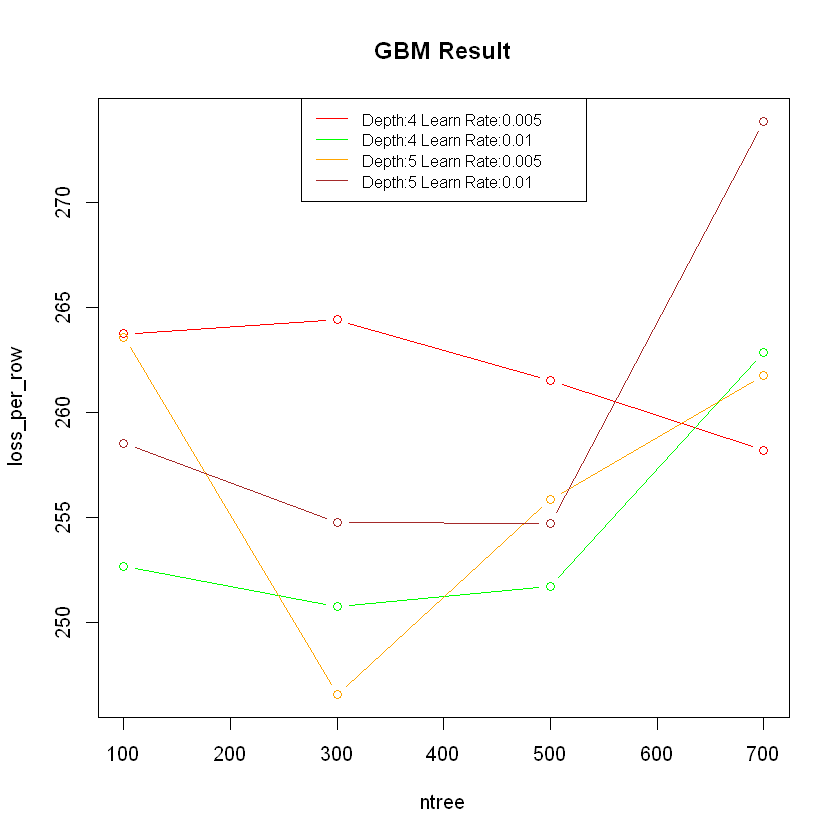

In [36]:
plot(gbm_result[,c("Group.2", "loss_per_row")], type ="n", main="GBM Result", xlab = "ntree")
lines(gbm_result[(gbm_result$Group.1==4) & (gbm_result$Group.3==0.005),c("Group.2", "loss_per_row")], type="b", col="red")
lines(gbm_result[(gbm_result$Group.1==4) & (gbm_result$Group.3==0.01),c("Group.2", "loss_per_row")], type="b", col="green")
lines(gbm_result[(gbm_result$Group.1==5) & (gbm_result$Group.3==0.005),c("Group.2", "loss_per_row")], type="b", col="orange")
lines(gbm_result[(gbm_result$Group.1==5) & (gbm_result$Group.3==0.01),c("Group.2", "loss_per_row")], type="b", col="brown")
    legend("top", 
           legend=c("Depth:4 Learn Rate:0.005", "Depth:4 Learn Rate:0.01", 
                    "Depth:5 Learn Rate:0.005", "Depth:5 Learn Rate:0.01"), 
           col=c("red", "green", "orange", "brown"), lty=1, cex=0.8)

min loss = 246.5514, with depth = 5, ntrees = 300 and learn rate = 0.005

### Random Forest

In [37]:
set.seed(1)
rf_cv_list={}
for (mtry in c(3, 6, 9 ,12, 20, 40)){for (splitrule in c("gini", "extratrees")){
    fitControl=trainControl(method = "cv",
                            number = 2,
                            classProbs=TRUE, 
                            summaryFunction=twoClassSummary,
                            sampling="up")
    rf_grid = expand.grid(mtry=mtry, splitrule=splitrule, min.node.size = 5)
    for (k in c(1:10)){
        fld = paste0("Fold", k)
        trn = train_pca[train_pca$fold!=fld]
        tst = train_pca[train_pca$fold==fld]
        rf_fit=train(target ~ ., 
                       data = trn[, -c("loan_amount", "fold")],
                       method = "ranger", 
                       trControl = fitControl, 
                       metric = "ROC",
                       tuneGrid=rf_grid)
        pred = predict(rf_fit, tst[, -c("loan_amount", "fold")])
        tst = cbind(tst, pred)
        loss_per_row = calculate_loss(tst) / nrow(tst)
        auc = rf_fit$results["ROC"]
        sensitivity = rf_fit$results["Sens"]
        specificity = rf_fit$results["Spec"]
        rf_cv_list = rbind(cbind(mtry, splitrule, fld, loss_per_row, auc, sensitivity, specificity), rf_cv_list)
    }
}}

In [38]:
rf_result = aggregate(rf_cv_list[, 4:7], list(rf_cv_list$mtry, rf_cv_list$splitrule), mean)

In [39]:
rf_result

Group.1,Group.2,loss_per_row,ROC,Sens,Spec
3,extratrees,336.9615,0.7399821,0.9992072,0.011019687
6,extratrees,337.6143,0.7460189,0.9982703,0.008465446
9,extratrees,337.2744,0.7424692,0.9976228,0.019553046
12,extratrees,337.6143,0.7489472,0.9967586,0.018832988
20,extratrees,335.3318,0.7559081,0.9958937,0.029095984
40,extratrees,331.3472,0.7406982,0.9952472,0.031139916
3,gini,328.1603,0.7244628,0.9963285,0.030981637
6,gini,328.2969,0.7298786,0.9926560,0.053019931
9,gini,325.5176,0.7256016,0.9886889,0.056408310
12,gini,324.9459,0.7195850,0.9859572,0.063329022


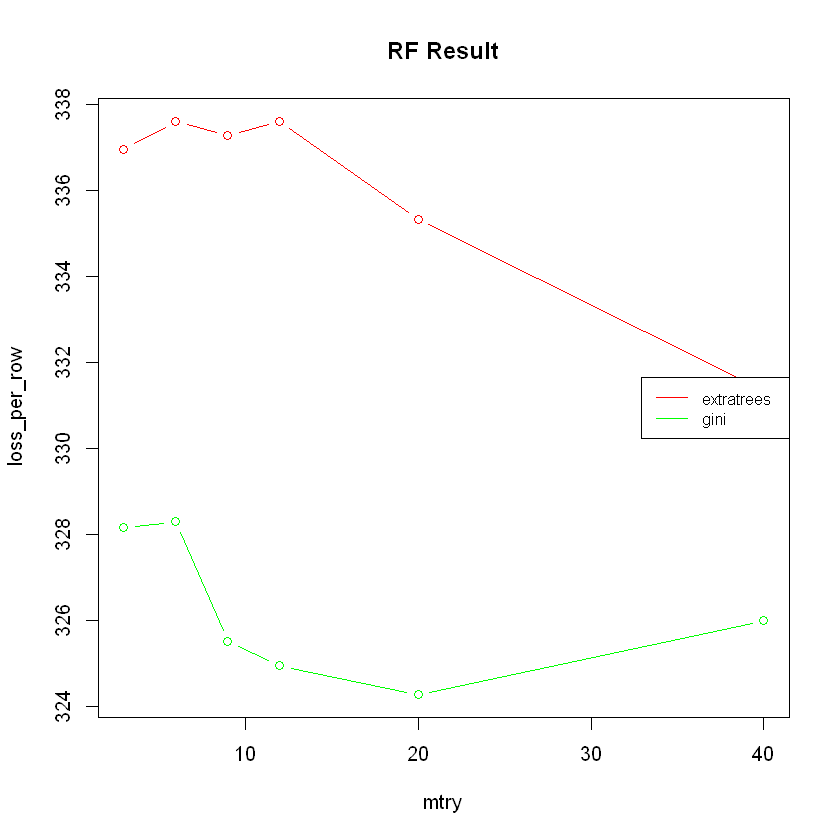

In [44]:
plot(rf_result[,c("Group.1", "loss_per_row")], type ="n", main="RF Result", xlab="mtry")
lines(rf_result[(rf_result$Group.2=="extratrees"),c("Group.1", "loss_per_row")], type="b", col="red")
lines(rf_result[(rf_result$Group.2=="gini") ,c("Group.1", "loss_per_row")], type="b", col="green")
legend("right", legend=c("extratrees", "gini"), 
       col=c("red", "green"), lty=1, cex=0.8)

min loss = 324.2748, mry = 20, splitrule = gini

### SVM

In [41]:
set.seed(1)
svm_cv_list={}
for (C in c(0.25, 0.5, 1, 2)){ for (sigma in c(0.01, 0.02, 0.03)){
    fitControl=trainControl(method = "cv",
                            number = 2,
                            classProbs=TRUE, 
                            summaryFunction=twoClassSummary,
                            sampling="up")
    svm_grid = expand.grid(C=C, sigma=sigma)
    for (k in c(1:10)){
        fld = paste0("Fold", k)
        trn = train_pca[train_pca$fold!=fld]
        tst = train_pca[train_pca$fold==fld]
        svm_fit=train(target ~ ., 
                       data = trn[, -c("loan_amount", "fold")],
                       method = "svmRadial", 
                       trControl = fitControl, 
                       metric = "ROC",
                       tuneGrid=svm_grid)
        pred = predict(svm_fit, tst[, -c("loan_amount", "fold")])
        tst = cbind(tst, pred)
        loss_per_row = calculate_loss(tst) / nrow(tst)
        auc = svm_fit$results["ROC"]
        sensitivity = svm_fit$results["Sens"]
        specificity = svm_fit$results["Spec"]
        svm_cv_list = rbind(cbind(C, sigma, fld, loss_per_row, auc, sensitivity, specificity), svm_cv_list)
    }
}}

In [42]:
svm_result = aggregate(svm_cv_list[, 4:7], list(svm_cv_list$C, svm_cv_list$sigma), mean)

In [43]:
svm_result

Group.1,Group.2,loss_per_row,ROC,Sens,Spec
0.25,0.01,239.7327,0.7577281,0.7900214,0.5667245
0.50,0.01,226.8328,0.7483636,0.8147934,0.5178026
1.00,0.01,246.5035,0.7536536,0.8378375,0.4756903
2.00,0.01,255.2703,0.7444711,0.8634053,0.4188989
0.25,0.02,248.3284,0.7559360,0.8412167,0.4606936
0.50,0.02,254.4642,0.7545311,0.8677890,0.4138307
1.00,0.02,250.3650,0.7416297,0.8996125,0.3271597
2.00,0.02,276.4549,0.7361868,0.9239584,0.2565232
0.25,0.03,259.1049,0.7475844,0.8743425,0.3961782
0.50,0.03,262.1754,0.7317394,0.9043690,0.3153223


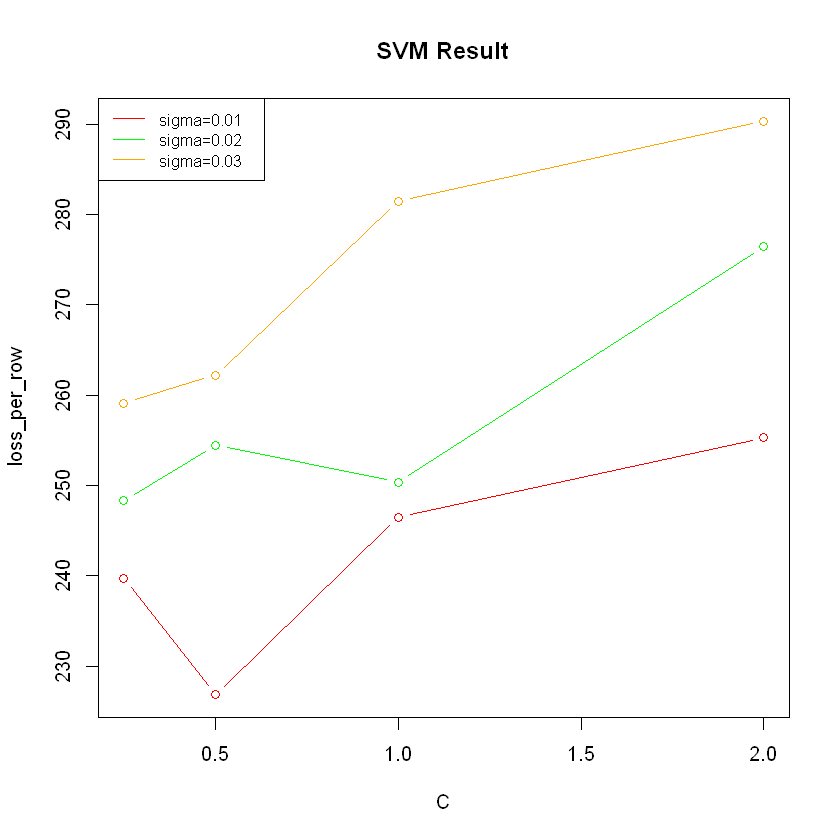

In [45]:
plot(svm_result[,c("Group.1", "loss_per_row")], type ="n", main="SVM Result", xlab = "C")
lines(svm_result[(svm_result$Group.2==0.01),c("Group.1", "loss_per_row")], type="b", col="red")
lines(svm_result[(svm_result$Group.2==0.02) ,c("Group.1", "loss_per_row")], type="b", col="green")
lines(svm_result[(svm_result$Group.2==0.03) ,c("Group.1", "loss_per_row")], type="b", col="orange")
    legend("topleft", 
           legend=c("sigma=0.01", "sigma=0.02", "sigma=0.03"), 
           col=c("red", "green", "orange"), lty=1, cex=0.8)

min loss = 226.8328, C = 0.5 and sigma = 0.01

## Model Comparison

In [52]:
cart_loss = cart_cv_list[cart_cv_list$cp==0.25,"loss_per_row"]
lasso_loss = lasso_cv_list[lasso_cv_list$lambda==0.0225,"loss_per_row"]
gbm_loss = gbm_cv_list[(gbm_cv_list$depth==5) & 
                           (gbm_cv_list$ntree==300) &
                           (gbm_cv_list$learn_rate==0.005),"loss_per_row"]
rf_loss = rf_cv_list[(rf_cv_list$splitrule=="gini") &
                         (rf_cv_list$mtry==20),"loss_per_row"]
svm_loss = svm_cv_list[(svm_cv_list$C==0.5) &
                           (svm_cv_list$sigma==0.01),"loss_per_row"]

In [53]:
selected = cbind(cart_loss, lasso_loss, gbm_loss, rf_loss, svm_loss)
selected

cart_loss,lasso_loss,gbm_loss,rf_loss,svm_loss
309.9066,125.2449,224.5054,451.1781,205.3411
308.0365,210.7469,210.0544,352.5003,207.7012
236.6494,250.2610,261.5845,272.9532,221.9923
212.9585,145.2149,201.6102,247.6827,220.2735
259.5648,274.6161,336.0301,406.8711,312.3845
208.6507,149.0920,192.8100,231.3616,147.7453
355.1227,301.6552,310.0432,420.3689,247.6233
292.7299,211.0840,226.0176,358.0343,283.2892
227.8949,210.7411,248.1781,277.0680,204.7003
270.3074,266.2267,254.6807,224.7299,217.2769


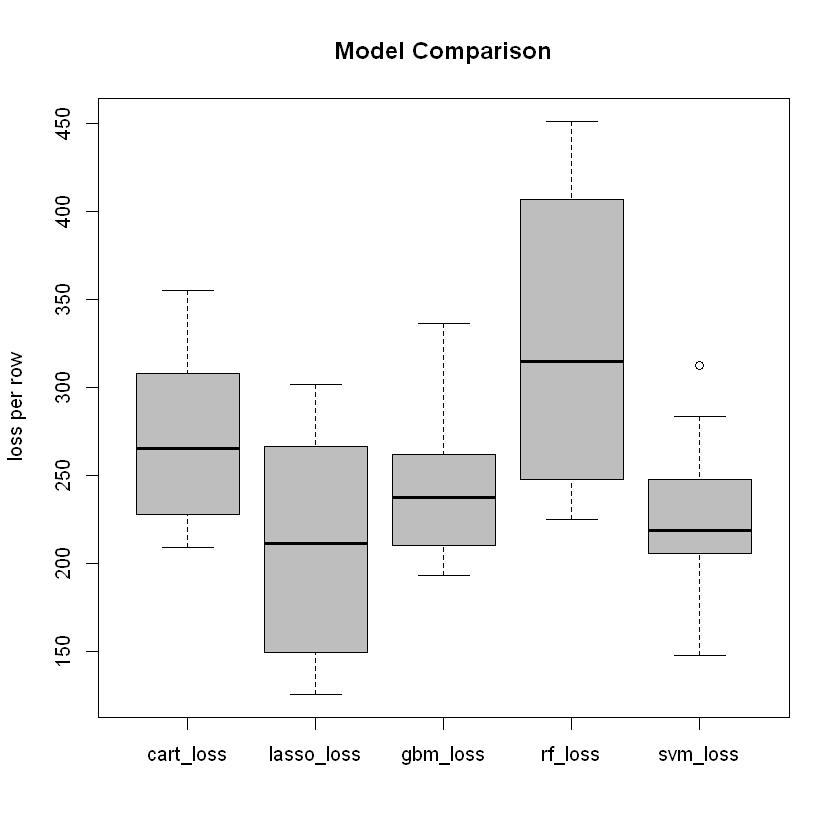

In [59]:
boxplot(selected, main = "Model Comparison", ylab = "loss per row", col="grey")

## Predict Test

In [83]:
test = fread("test.csv")

In [84]:
head(test)

loan_application_id,loan_amount,default,customer_age,Var_1,Var_2,Var_3,Var_4,Var_5,Var_6,...,Var_50,Var_51,Var_52,Var_53,Var_54,Var_55,Var_56,Var_57,Var_58,Var_59
6,2106.0,NA,58,2,0,6,101,101,20,...,1500,1533,3300,N,1100,0,0,1,5,0
9,4034.0,NA,49,2,2,3,53,76,15,...,500,141,650,N,325,0,0,4,7,0
18,2742.0,NA,64,2,0,1,54,54,5,...,500,0,500,N,500,8729,294,0,5,0
20,1752.0,NA,69,4,1,2,140,140,12,...,2250,0,2250,N,2250,6075,607,0,8,0
22,2340.5,NA,31,1,1,1,28,87,4,...,0,0,0,N,0,0,0,0,2,0
23,2138.0,NA,28,4,0,0,112,112,8,...,1000,173,1000,N,1000,0,0,1,3,0


In [85]:
test[test$customer_age<30, age_bin:="Young"]
test[(test$customer_age>=30) & (test$customer_age<50), age_bin:="Mid"]
test[test$customer_age>=50, age_bin:="Old"]

In [86]:
cols = c("Var_39", "Var_53", "age_bin")
test[,(cols):=lapply(.SD, as.factor),.SDcols=cols]

In [87]:
any(is.na(test[,-c("default")]))

[1] FALSE

In [88]:
num_test = test[, -c("loan_application_id", "default", "customer_age", "Var_39", "Var_53", "age_bin")]

In [89]:
# apply previously used pca
pca_test = predict(pca, num_test)

In [90]:
# apply previously used scaling
pca_test_scaled = predict(preProcValues, pca_test)

In [91]:
pca_test_scaled = pca_test_scaled[,c(1:38)]

In [92]:
test_pca = test[, c("loan_application_id", "loan_amount", "age_bin", "Var_39", "Var_53")]
test_pca = cbind(test_pca, pca_test_scaled)

In [93]:
# re-train selected model with related parameters using train data

set.seed(1)
fitControl=trainControl(method = "cv",
                        number = 2,
                        classProbs=TRUE, 
                        summaryFunction=twoClassSummary,
                        sampling="up")
grid = expand.grid(sigma=0.01, C = 0.5)
fit=train(target ~ ., 
          data = train_pca[, -c("fold", "loan_amount")],
          method = "svmRadial", 
          trControl = fitControl, 
          metric = "ROC",
          tuneGrid=grid)

In [94]:
pred = predict(fit, test_pca[, -c("loan_application_id", "loan_amount")])
result = cbind(test_pca, pred)
result[result$pred=="Class_0", prediction:=0]
result[result$pred=="Class_1", prediction:=1]

In [95]:
output = result[, c("loan_application_id", "prediction")]

In [99]:
fwrite(output, "test_predictions.csv")

In [97]:
table(output$prediction)


  0   1 
740 107 

In [98]:
nrow(test)

[1] 847